# Fuel Blend Properties Prediction: Exploratory Data Analysis

This notebook explores the fuel blend dataset to understand its structure, relationships, and prepare for modeling.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

# Set plotting style
sns.set_style('whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore')

## Step 1: Basic Data Examination

Let's start by loading the datasets and examining their basic structure.

In [2]:
# Load the datasets
print("Loading datasets...")
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')
sample_solution = pd.read_csv('dataset/sample_solution.csv')

print("\n=== DATASET DIMENSIONS ===")
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Sample solution shape: {sample_solution.shape}")

Loading datasets...

=== DATASET DIMENSIONS ===
Training data shape: (2000, 65)
Test data shape: (500, 56)
Sample solution shape: (500, 11)


In [3]:
# Examine the first few rows of each dataset
print("First 5 rows of training data:")
train_data.head()

First 5 rows of training data:


Component1_fraction  Component2_fraction  Component3_fraction  \
0                0.210                0.000                0.420   
1                0.020                0.330                0.190   
2                0.080                0.080                0.180   
3                0.250                0.420                0.000   
4                0.260                0.160                0.080   

   Component4_fraction  Component5_fraction  Component1_Property1  \
0                0.250                0.120                -0.022   
1                0.460                0.000                -0.224   
2                0.500                0.160                 0.458   
3                0.070                0.260                -0.578   
4                0.500                0.000                 0.120   

   Component2_Property1  Component3_Property1  Component4_Property1  \
0                 1.981                 0.020                 0.140   
1                 1.148                -1.108                 0.150   
2                 0.243                -0.922                 0.908   
3                -0.931                 0.815                 0.448   
4                 0.666                -0.627                 2.725   

   Component5_Property1  Component1_Property2  Component2_Property2  \
0                 1.032                -1.230                -0.580   
1                -0.354                -1.075                 0.893   
2                 0.972                 0.240                 2.210   
3                 0.456                -0.588                 1.963   
4                 0.392                 0.128                -0.177   

   Component3_Property2  Component4_Property2  Component5_Property2  \
0                 0.134                 0.818                 0.216   
1                 1.363                -1.744                 1.273   
2                -2.652                -0.594                -0.678   
3                -1.148                 0.269                 0.207   
4                -1.518                 0.114                 0.626   

   Component1_Property3  Component2_Property3  Component3_Property3  \
0                -0.393                 0.221                 0.656   
1                -0.691                -0.256                 1.271   
2                -0.271                 1.434                 0.499   
3                 0.913                -0.515                 0.218   
4                 1.342                -0.007                -0.371   

   Component4_Property3  Component5_Property3  Component1_Property4  \
0                 0.074                -3.083                -1.763   
1                -0.334                -2.087                -1.870   
2                -0.942                 1.438                -3.063   
3                 0.319                -1.338                 0.735   
4                 0.577                 0.115                -0.580   

   Component2_Property4  Component3_Property4  Component4_Property4  \
0                 0.985                -1.548                -1.654   
1                 0.896                -1.541                -0.245   
2                -0.279                 0.356                 0.480   
3                -0.231                 0.754                 0.992   
4                -1.080                -1.330                -1.522   

   Component5_Property4  Component1_Property5  Component2_Property5  \
0                -1.410                 0.052                 1.006   
1                -0.175                -0.375                 1.082   
2                -0.047                 0.186                -0.020   
3                -0.971                -0.238                 0.486   
4                 0.487                 0.639                -0.144   

   Component3_Property5  Component4_Property5  Component5_Property5  \
0                -0.431                 1.744                 0.297   
1                -0.017                -1.914   

In [4]:
print("First 5 rows of test data:")
test_data.head()

First 5 rows of test data:


ID  Component1_fraction  Component2_fraction  Component3_fraction  \
0   1                0.180                0.050                0.320   
1   2                0.000                0.500                0.000   
2   3                0.160                0.000                0.170   
3   4                0.500                0.000                0.170   
4   5                0.000                0.000                0.500   

   Component4_fraction  Component5_fraction  Component1_Property1  \
0                0.370                0.080                -0.178   
1                0.370                0.130                 2.501   
2                0.500                0.170                 1.547   
3                0.160                0.170                -0.424   
4                0.500                0.000                -0.187   

   Component2_Property1  Component3_Property1  Component4_Property1  \
0                -0.741                 0.770                -0.877   
1                 0.177                -0.499                -0.197   
2                 0.891                 0.031                -0.369   
3                 1.017                -1.183                -0.854   
4                -0.762                -0.474                 2.074   

   Component5_Property1  Component1_Property2  Component2_Property2  \
0                 0.603                 0.916                -0.961   
1                -1.943                -1.573                 1.151   
2                -0.295                -0.368                 1.886   
3                -0.830                 0.211                -2.067   
4                 0.757                 1.192                -0.113   

   Component3_Property2  Component4_Property2  Component5_Property2  \
0                 2.204                -1.544                -2.190   
1                -2.224                -1.364                 0.322   
2                 1.468                -0.574                -0.883   
3                 1.473                -0.874                -0.386   
4                -0.445                -2.505                 0.985   

   Component1_Property3  Component2_Property3  Component3_Property3  \
0                 0.729                 1.880                -0.929   
1                 1.133                 1.016                 0.580   
2                -0.301                -1.575                -0.742   
3                 0.164                -0.237                -0.634   
4                 0.864                 0.044                 0.822   

   Component4_Property3  Component5_Property3  Component1_Property4  \
0                -0.046                -1.204                -0.575   
1                 0.223                 0.176                 0.552   
2                 1.241                 1.438                -1.321   
3                -0.554                -1.866                -2.210   
4                 0.458                -0.676                 0.019   

   Component2_Property4  Component3_Property4  Component4_Property4  \
0                -0.557                -0.090                 2.858   
1                 0.611                 0.419                 0.470   
2                -0.353                 0.747                -0.290   
3                -1.671                 0.923                 0.638   
4                -1.175                -0.079                 1.748   

   Component5_Property4  Component1_Property5  Component2_Property5  \
0                 0.265                -0.264                 1.470   
1                 1.606                 0.708                -0.592   
2                -1.914                 1.719                 0.608   
3                -0.400                 0.561                 1.297   
4                 0.392                 0.654                 1.697   

   Component3_Property5  Component4_Property5  Component5_Property5  \
0                 0.068                 1.127                -0.592   
1                 0.649 

In [5]:
print("First 5 rows of sample solution:")
sample_solution.head()

First 5 rows of sample solution:


ID  BlendProperty1  BlendProperty2  BlendProperty3  BlendProperty4  \
0   1          -0.117           0.348           0.474           0.080   
1   2          -0.504          -0.250          -1.413          -0.524   
2   3           1.484           1.273           1.189           1.321   
3   4           0.842           0.457           0.534           0.377   
4   5          -0.024           0.136           1.175          -0.197   

   BlendProperty5  BlendProperty6  BlendProperty7  BlendProperty8  \
0          -0.412           0.015           0.455           0.066   
1          -0.578          -0.294          -1.396          -0.856   
2           1.472           1.238           1.193           1.576   
3           1.593           0.158           0.516           0.632   
4           2.464           0.418           1.186           0.510   

   BlendProperty9  BlendProperty10  
0          -0.147           -0.140  
1          -0.003           -0.247  
2           0.774            1.917  
3           0.376           -0.446  
4          -0.435            0.807

### Dataset Structure Analysis

In [6]:
# Identify column groups
fraction_cols = [col for col in train_data.columns if 'fraction' in col]
property_cols = [col for col in train_data.columns if 'Property' in col and 'Blend' not in col]
target_cols = [col for col in train_data.columns if 'BlendProperty' in col]

print(f"Component fraction columns ({len(fraction_cols)}): {fraction_cols}")
print(f"\nComponent property columns ({len(property_cols)}): First 10 shown")
print(property_cols[:10])
print(f"\nTarget columns ({len(target_cols)}): {target_cols}")

Component fraction columns (5): ['Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction']

Component property columns (50): First 10 shown
['Component1_Property1', 'Component2_Property1', 'Component3_Property1', 'Component4_Property1', 'Component5_Property1', 'Component1_Property2', 'Component2_Property2', 'Component3_Property2', 'Component4_Property2', 'Component5_Property2']

Target columns (10): ['BlendProperty1', 'BlendProperty2', 'BlendProperty3', 'BlendProperty4', 'BlendProperty5', 'BlendProperty6', 'BlendProperty7', 'BlendProperty8', 'BlendProperty9', 'BlendProperty10']


In [7]:
# Check for missing values
print("\n=== MISSING VALUES CHECK ===")
print(f"Missing values in training data: {train_data.isnull().sum().sum()}")
print(f"Missing values in test data: {test_data.isnull().sum().sum()}")

# Check data types
print("\n=== DATA TYPES ===")
print("Training data types:")
print(train_data.dtypes.value_counts())


=== MISSING VALUES CHECK ===
Missing values in training data: 0
Missing values in test data: 0

=== DATA TYPES ===
Training data types:
float64    65
Name: count, dtype: int64


### Component Fractions Verification

Let's verify that the component fractions sum to 1.0 for each blend.

Fraction sums - Min: 1.000000, Max: 1.000000
All fractions sum to 1.0: True


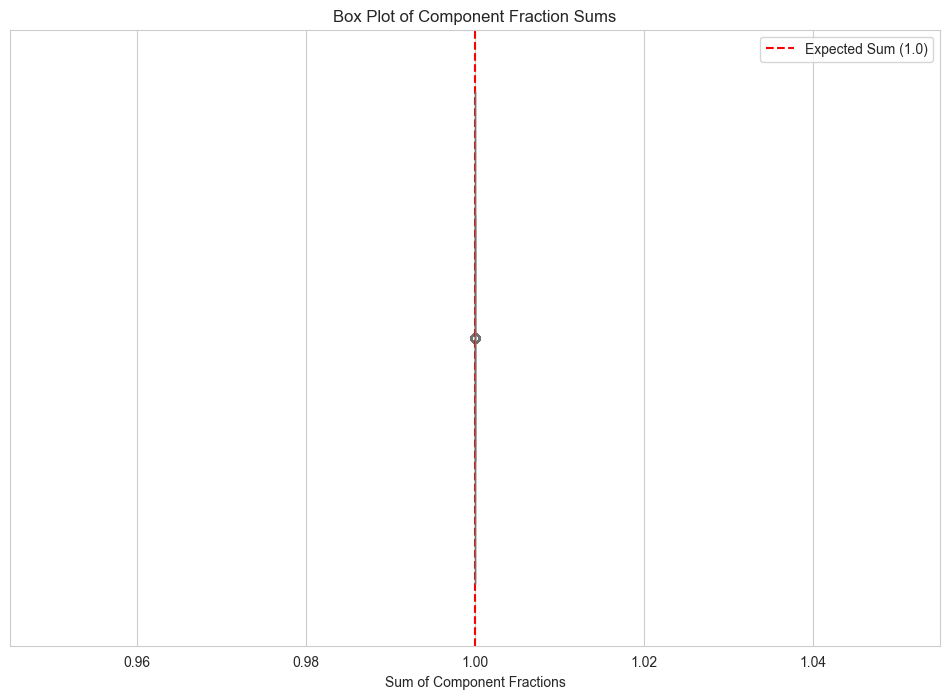

In [10]:
# Check if fractions sum to 1
fraction_sums = train_data[fraction_cols].sum(axis=1)
print(f"Fraction sums - Min: {fraction_sums.min():.6f}, Max: {fraction_sums.max():.6f}")
print(f"All fractions sum to 1.0: {np.allclose(fraction_sums, 1.0, atol=1e-10)}")

sns.boxplot(x=fraction_sums, color="skyblue")
plt.axvline(1.0, color='r', linestyle='--', label='Expected Sum (1.0)')
plt.title('Box Plot of Component Fraction Sums')
plt.xlabel('Sum of Component Fractions')
plt.legend()
plt.show()


### Basic Statistics

In [11]:
# Summary statistics for component fractions
print("Component fractions summary:")
train_data[fraction_cols].describe().round(3)

Component fractions summary:


Component1_fraction  Component2_fraction  Component3_fraction  \
count             2000.000             2000.000             2000.000   
mean                 0.181                0.183                0.180   
std                  0.163                0.164                0.166   
min                  0.000                0.000                0.000   
25%                  0.030                0.040                0.020   
50%                  0.140                0.150                0.140   
75%                  0.290                0.300                0.290   
max                  0.500                0.500                0.500   

       Component4_fraction  Component5_fraction  
count             2000.000             2000.000  
mean                 0.342                0.114  
std                  0.141                0.080  
min                  0.010                0.000  
25%                  0.220                0.050  
50%                  0.350                0.120  
75%                  0.500                0.180  
max                  0.500                0.290

In [12]:
# Summary statistics for target properties
print("Target properties summary:")
train_data[target_cols].describe().round(3)

Target properties summary:


BlendProperty1  BlendProperty2  BlendProperty3  BlendProperty4  \
count        2000.000        2000.000        2000.000        2000.000   
mean           -0.017          -0.002          -0.014          -0.006   
std             0.994           1.005           0.999           1.009   
min            -2.551          -3.080          -3.042          -2.836   
25%            -0.766          -0.735          -0.624          -0.784   
50%            -0.021           0.002           0.146          -0.028   
75%             0.715           0.724           0.728           0.665   
max             2.857           2.769           1.639           3.770   

       BlendProperty5  BlendProperty6  BlendProperty7  BlendProperty8  \
count        2000.000        2000.000        2000.000        2000.000   
mean           -0.015          -0.003          -0.014          -0.017   
std             0.986           1.009           1.001           0.999   
min            -1.730          -2.808          -2.995          -3.621   
25%            -0.683          -0.697          -0.622          -0.726   
50%            -0.251          -0.012           0.133          -0.002   
75%             0.359           0.695           0.704           0.685   
max             3.600           3.433           3.293           3.341   

       BlendProperty9  BlendProperty10  
count        2000.000         2000.000  
mean           -0.002           -0.002  
std             1.001            0.990  
min            -3.293           -2.476  
25%            -0.702           -0.734  
50%            -0.003           -0.010  
75%             0.706            0.694  
max             3.276            2.709

### Data Quality Checks

In [13]:
print("=== DATA QUALITY CHECKS ===")
print(f"Duplicate rows in training data: {train_data.duplicated().sum()}")
print(f"Duplicate rows in test data: {test_data.duplicated().sum()}")
print(f"Infinite values in training data: {np.isinf(train_data.select_dtypes(include=[np.number])).sum().sum()}")
print(f"Infinite values in test data: {np.isinf(test_data.select_dtypes(include=[np.number])).sum().sum()}")

=== DATA QUALITY CHECKS ===
Duplicate rows in training data: 0
Duplicate rows in test data: 0
Infinite values in training data: 0
Infinite values in test data: 0


### Component Usage Analysis

Let's analyze how often each component is used in the blends.

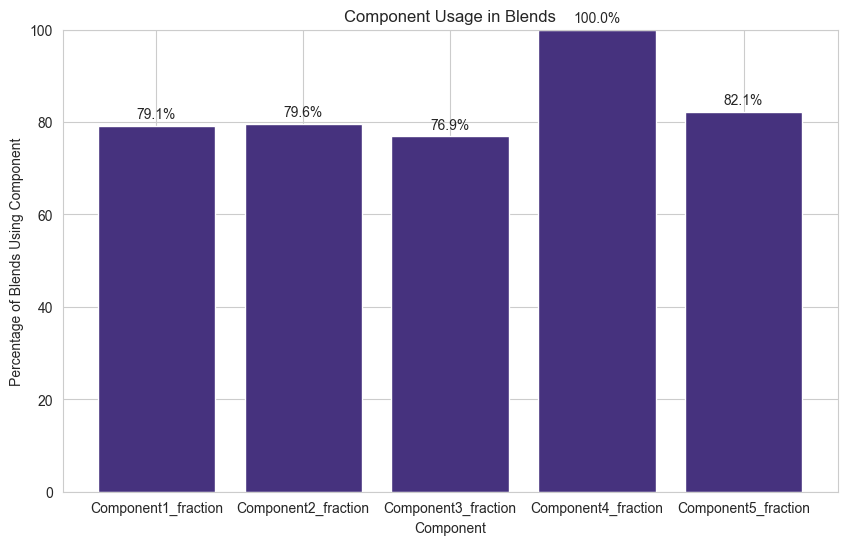

Component1_fraction: 418 zeros (20.9% not used, 79.1% used)
Component2_fraction: 408 zeros (20.4% not used, 79.6% used)
Component3_fraction: 462 zeros (23.1% not used, 76.9% used)
Component4_fraction: 0 zeros (0.0% not used, 100.0% used)
Component5_fraction: 358 zeros (17.9% not used, 82.1% used)


In [14]:
# Check for zero fractions (components not used)
zero_fractions = {}
for col in fraction_cols:
    zero_count = (train_data[col] == 0).sum()
    zero_pct = (zero_count / len(train_data)) * 100
    zero_fractions[col] = zero_pct
    
# Plot component usage
plt.figure(figsize=(10, 6))
bars = plt.bar(zero_fractions.keys(), [100 - v for v in zero_fractions.values()])
plt.title('Component Usage in Blends')
plt.xlabel('Component')
plt.ylabel('Percentage of Blends Using Component')
plt.ylim(0, 100)

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom')
plt.show()

# Print the actual percentages
for col, pct in zero_fractions.items():
    zero_count = (train_data[col] == 0).sum()
    print(f"{col}: {zero_count} zeros ({pct:.1f}% not used, {100-pct:.1f}% used)")

## Step 2: Component Fractions Analysis

Let's analyze the distribution and relationships of component fractions in more detail.

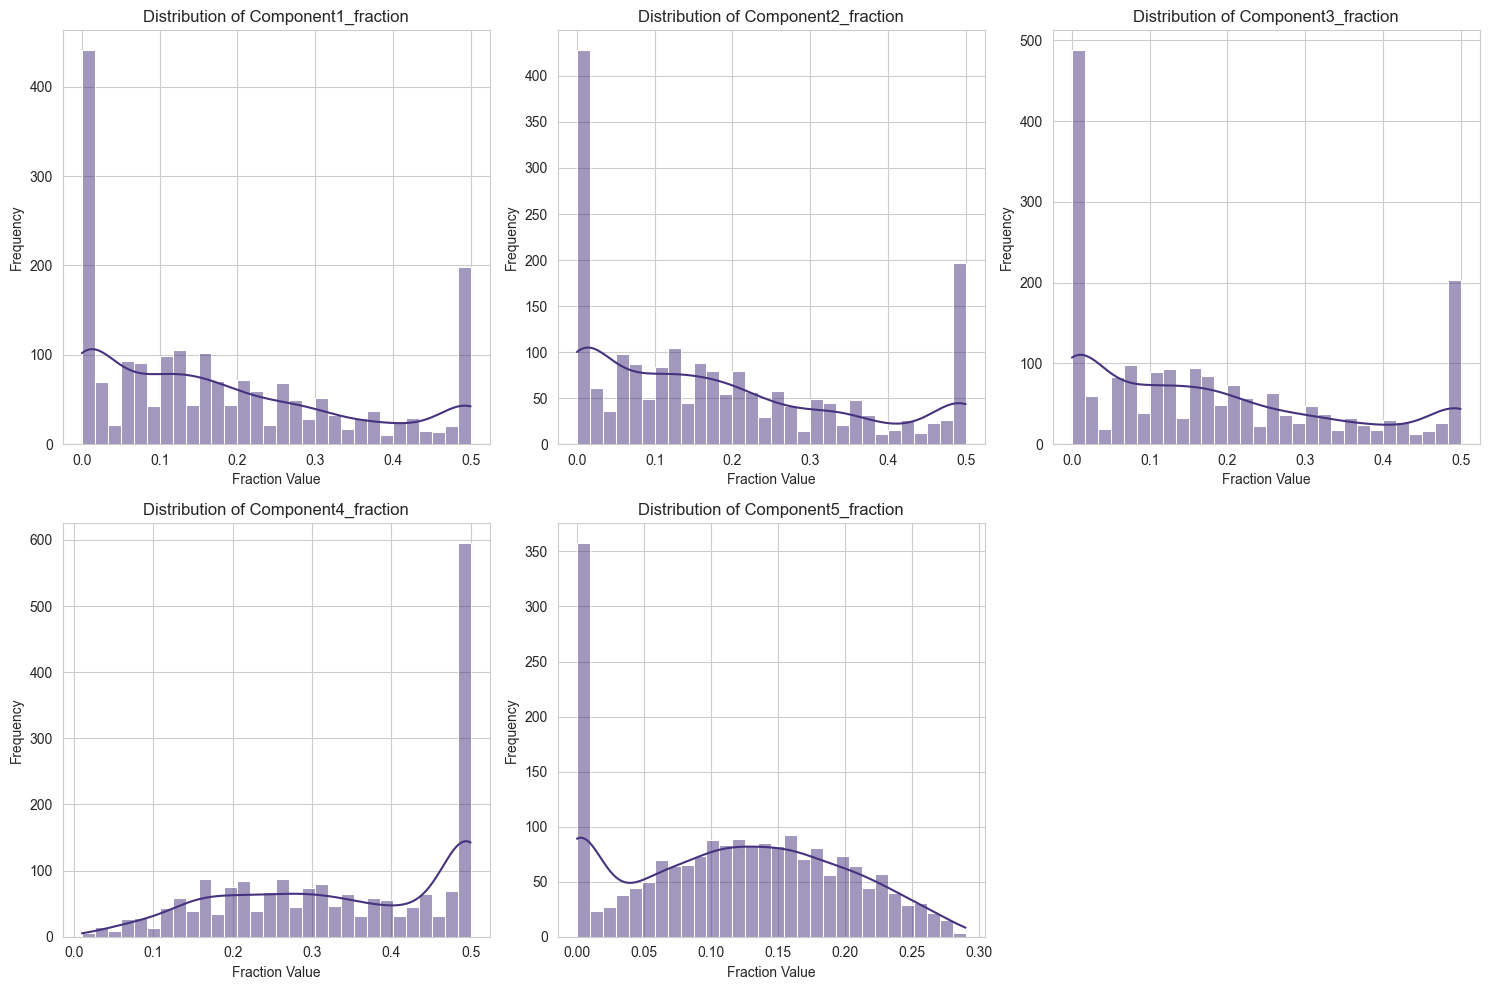

In [15]:
# Distribution of component fractions
plt.figure(figsize=(15, 10))
for i, col in enumerate(fraction_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Fraction Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

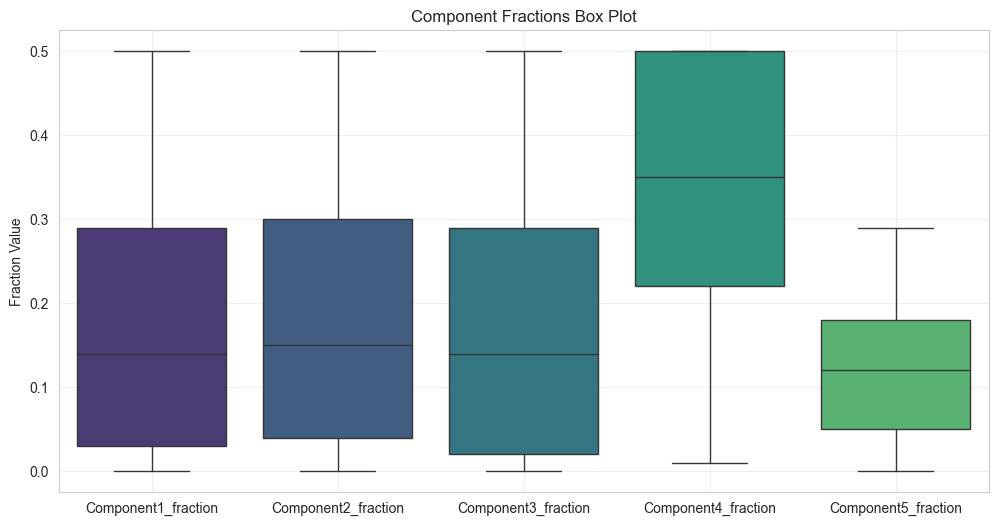

In [16]:
# Box plots of component fractions
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data[fraction_cols])
plt.title('Component Fractions Box Plot')
plt.ylabel('Fraction Value')
plt.grid(True, alpha=0.3)
plt.show()

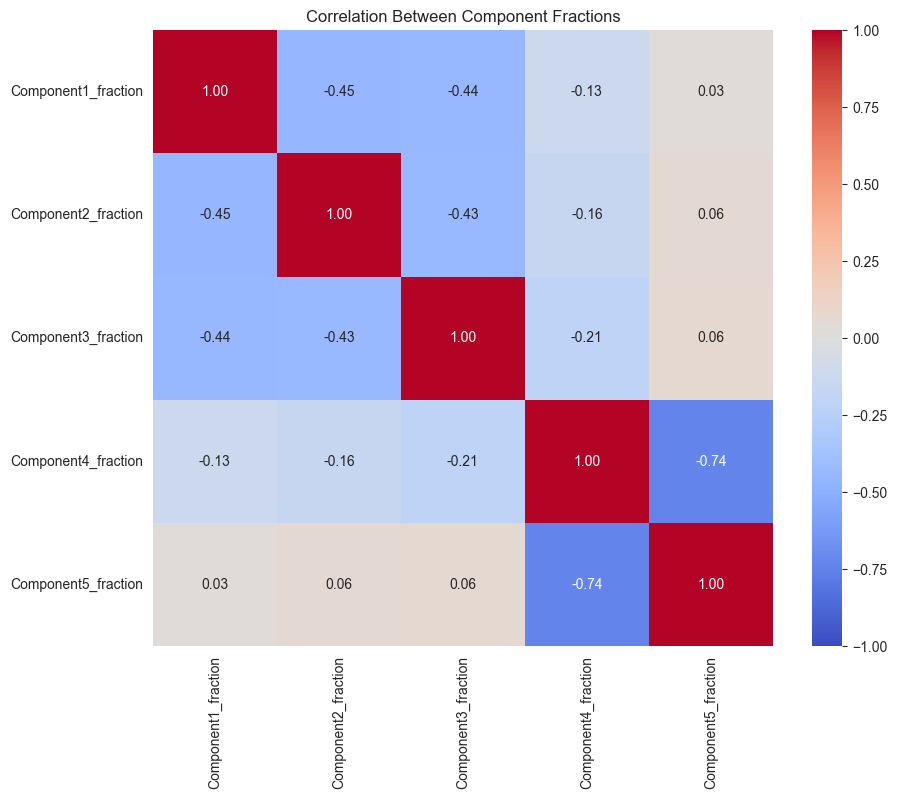

Correlation matrix of component fractions:


Component1_fraction  Component2_fraction  \
Component1_fraction                1.000               -0.452   
Component2_fraction               -0.452                1.000   
Component3_fraction               -0.441               -0.430   
Component4_fraction               -0.128               -0.162   
Component5_fraction                0.029                0.056   

                     Component3_fraction  Component4_fraction  \
Component1_fraction               -0.441               -0.128   
Component2_fraction               -0.430               -0.162   
Component3_fraction                1.000               -0.205   
Component4_fraction               -0.205                1.000   
Component5_fraction                0.063               -0.742   

                     Component5_fraction  
Component1_fraction                0.029  
Component2_fraction                0.056  
Component3_fraction                0.063  
Component4_fraction               -0.742  
Component5_fraction                1.000

In [17]:
# Correlation between component fractions
plt.figure(figsize=(10, 8))
fraction_corr = train_data[fraction_cols].corr()
sns.heatmap(fraction_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Between Component Fractions')
plt.show()

print("Correlation matrix of component fractions:")
fraction_corr

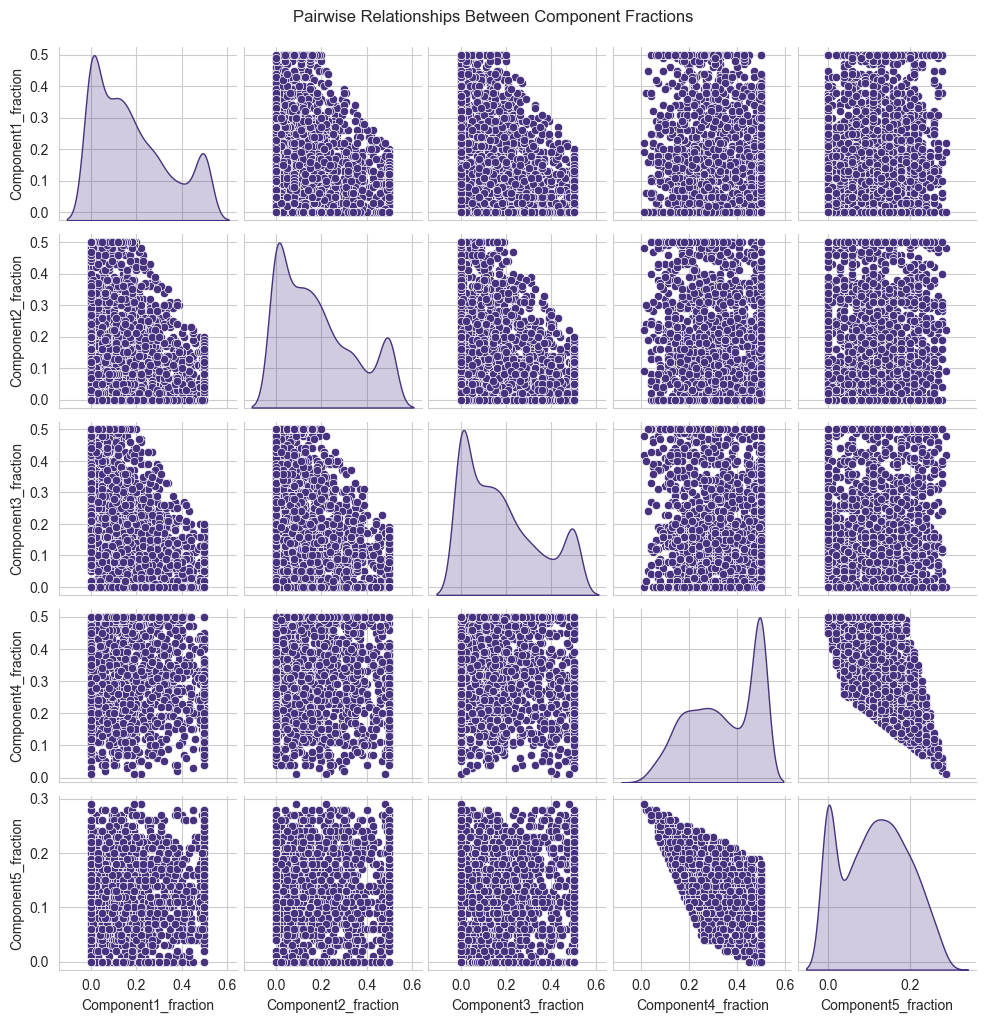

In [18]:
# Pairplot of component fractions
sns.pairplot(train_data[fraction_cols], diag_kind='kde', height=2)
plt.suptitle('Pairwise Relationships Between Component Fractions', y=1.02)
plt.show()

### Common Blend Patterns

Let's identify common blending patterns by analyzing the most frequent combinations.

In [19]:
# Create binary indicators for component presence
component_presence = train_data[fraction_cols].applymap(lambda x: 1 if x > 0 else 0)

# Count frequency of each combination pattern
pattern_counts = component_presence.value_counts().reset_index()
pattern_counts.columns = list(fraction_cols) + ['Count']
pattern_counts['Percentage'] = pattern_counts['Count'] / len(train_data) * 100

# Display the most common patterns
print("Most common component combinations:")
pattern_counts.head(10)

Most common component combinations:


Component1_fraction  Component2_fraction  Component3_fraction  \
0                    1                    1                    1   
1                    1                    1                    0   
2                    0                    1                    1   
3                    1                    0                    1   
4                    1                    1                    1   
5                    1                    0                    0   
6                    1                    0                    1   
7                    1                    1                    0   
8                    0                    1                    0   
9                    0                    1                    0   

   Component4_fraction  Component5_fraction  Count  Percentage  
0                    1                    1    801      40.050  
1                    1                    1    267      13.350  
2                    1                    1    253      12.650  
3                    1                    1    228      11.400  
4                    1                    0    121       6.050  
5                    1                    0     46       2.300  
6                    1                    0     45       2.250  
7                    1                    0     42       2.100  
8                    1                    0     40       2.000  
9                    1                    1     35       1.750

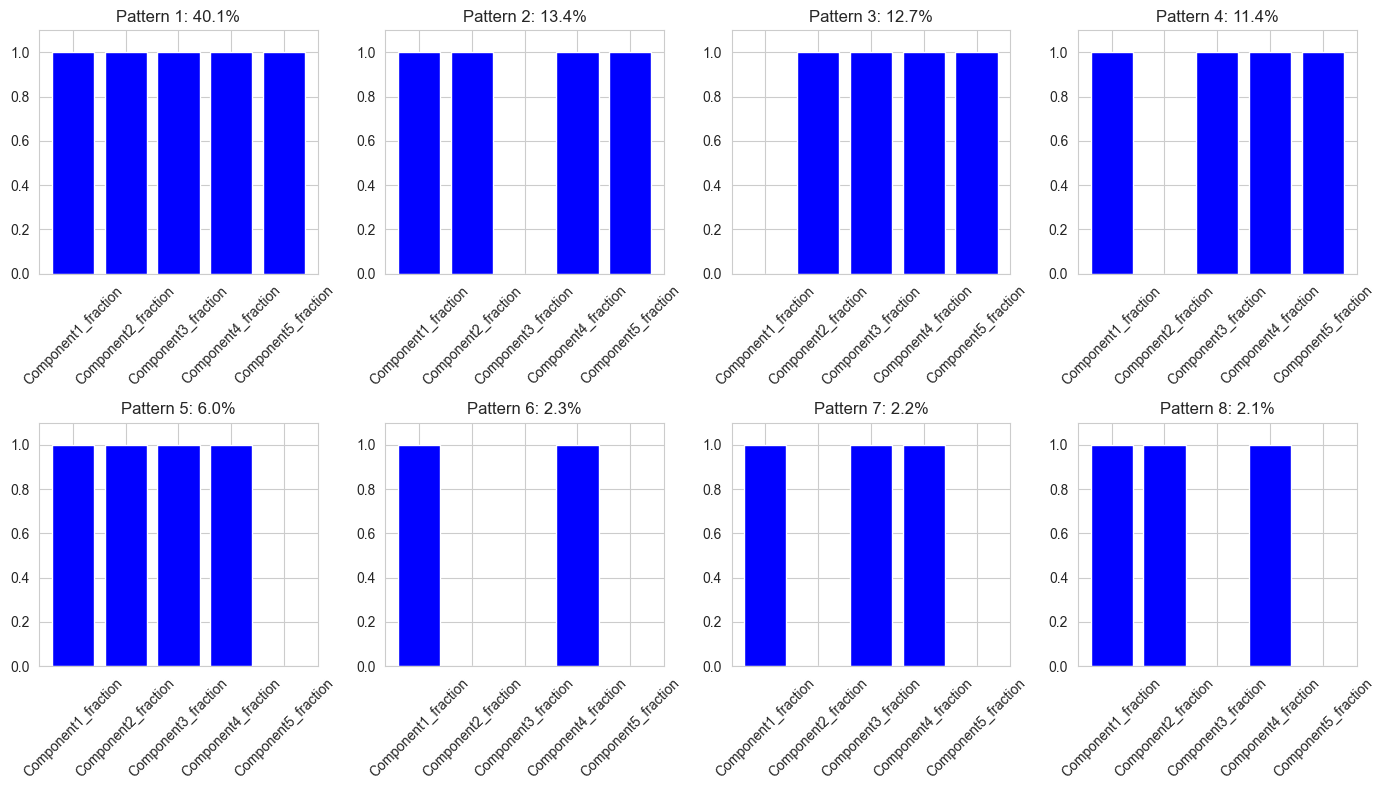

In [20]:
# Visualize the most common patterns
top_patterns = pattern_counts.head(8)

plt.figure(figsize=(14, 8))
for i, row in enumerate(top_patterns.itertuples(), 1):
    plt.subplot(2, 4, i)
    pattern = row[1:6]  # Extract the pattern (first 5 columns)
    plt.bar(fraction_cols, pattern, color=['blue' if x > 0 else 'lightgray' for x in pattern])
    plt.title(f'Pattern {i}: {row.Percentage:.1f}%')
    plt.ylim(0, 1.1)
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

### Component Dominance Analysis

Let's analyze which component tends to be the dominant one in blends.

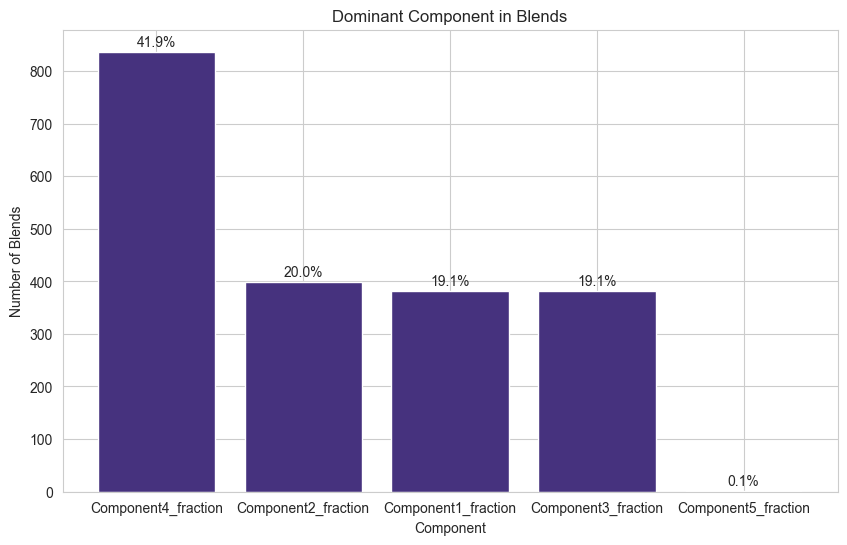

Component4_fraction: 837 blends (41.9%)
Component2_fraction: 399 blends (20.0%)
Component1_fraction: 382 blends (19.1%)
Component3_fraction: 381 blends (19.1%)
Component5_fraction: 1 blends (0.1%)


In [21]:
# Identify the dominant component in each blend
train_data['dominant_component'] = train_data[fraction_cols].idxmax(axis=1)

# Count occurrences of each dominant component
dominant_counts = train_data['dominant_component'].value_counts()
dominant_pct = dominant_counts / len(train_data) * 100

# Plot dominant component distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(dominant_counts.index, dominant_counts.values)
plt.title('Dominant Component in Blends')
plt.xlabel('Component')
plt.ylabel('Number of Blends')

# Add percentage labels
for bar, pct in zip(bars, dominant_pct):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{pct:.1f}%', ha='center', va='bottom')
plt.show()

# Print the actual counts and percentages
for comp, count in dominant_counts.items():
    pct = count / len(train_data) * 100
    print(f"{comp}: {count} blends ({pct:.1f}%)")

## Step 3: Component Properties Analysis

Now let's analyze the properties of each component and their distributions.

In [22]:
# Group properties by component
component_properties = {}
for i in range(1, 6):
    component_props = [col for col in property_cols if f'Component{i}_' in col]
    component_properties[f'Component{i}'] = component_props
    print(f"Component {i} properties: {len(component_props)} columns")
    print(f"Example columns: {component_props[:3]}...")

Component 1 properties: 10 columns
Example columns: ['Component1_Property1', 'Component1_Property2', 'Component1_Property3']...
Component 2 properties: 10 columns
Example columns: ['Component2_Property1', 'Component2_Property2', 'Component2_Property3']...
Component 3 properties: 10 columns
Example columns: ['Component3_Property1', 'Component3_Property2', 'Component3_Property3']...
Component 4 properties: 10 columns
Example columns: ['Component4_Property1', 'Component4_Property2', 'Component4_Property3']...
Component 5 properties: 10 columns
Example columns: ['Component5_Property1', 'Component5_Property2', 'Component5_Property3']...


In [23]:
# Basic statistics for component properties
for component, props in component_properties.items():
    print(f"\n{component} Properties Summary Statistics:")
    display(train_data[props].describe().round(3))


Component1 Properties Summary Statistics:


Component1_Property1  Component1_Property2  Component1_Property3  \
count              2000.000              2000.000              2000.000   
mean                  0.000                -0.006                 0.007   
std                   0.999                 1.004                 0.995   
min                  -2.944                -2.963                -3.005   
25%                  -0.695                -0.694                -0.650   
50%                   0.012                -0.027                -0.005   
75%                   0.686                 0.671                 0.666   
max                   2.981                 2.939                 2.980   

       Component1_Property4  Component1_Property5  Component1_Property6  \
count              2000.000              2000.000              2000.000   
mean                  0.003                -0.011                 0.000   
std                   0.999                 1.001                 0.999   
min                  -3.063                -3.153                -2.920   
25%                  -0.661                -0.677                -0.683   
50%                   0.039                -0.037                -0.032   
75%                   0.684                 0.663                 0.688   
max                   3.030                 3.039                 3.183   

       Component1_Property7  Component1_Property8  Component1_Property9  \
count              2000.000              2000.000              2000.000   
mean                  0.003                -0.010                -0.016   
std                   1.015                 0.994                 0.995   
min                  -2.941                -2.983                -3.287   
25%                  -0.715                -0.672                -0.670   
50%                  -0.031                 0.011                 0.044   
75%                   0.689                 0.617                 0.700   
max                   3.147                 2.959                 2.860   

       Component1_Property10  
count               2000.000  
mean                   0.003  
std                    0.998  
min                   -3.079  
25%                   -0.682  
50%                   -0.022  
75%                    0.644  
max                    3.046


Component2 Properties Summary Statistics:


Component2_Property1  Component2_Property2  Component2_Property3  \
count              2000.000              2000.000              2000.000   
mean                 -0.017                 0.000                -0.003   
std                   1.006                 0.992                 1.014   
min                  -1.719                -2.583                -2.933   
25%                  -0.765                -0.675                -0.712   
50%                  -0.030                -0.015                -0.012   
75%                   0.654                 0.683                 0.709   
max                   3.051                 3.135                 2.930   

       Component2_Property4  Component2_Property5  Component2_Property6  \
count              2000.000              2000.000              2000.000   
mean                 -0.002                 0.004                 0.014   
std                   1.010                 0.990                 1.007   
min                  -3.036                -2.507                -2.512   
25%                  -0.652                -0.687                -0.706   
50%                  -0.000                 0.034                 0.040   
75%                   0.693                 0.672                 0.718   
max                   3.076                 2.945                 3.038   

       Component2_Property7  Component2_Property8  Component2_Property9  \
count              2000.000              2000.000              2000.000   
mean                  0.011                -0.007                 0.005   
std                   0.999                 1.004                 0.992   
min                  -2.133                -1.784                -1.423   
25%                  -0.666                -0.732                -0.797   
50%                  -0.003                -0.054                -0.036   
75%                   0.665                 0.662                 0.726   
max                   3.113                 3.041                 3.258   

       Component2_Property10  
count               2000.000  
mean                  -0.004  
std                    1.000  
min                   -1.806  
25%                   -0.731  
50%                   -0.045  
75%                    0.681  
max                    3.036


Component3 Properties Summary Statistics:


Component3_Property1  Component3_Property2  Component3_Property3  \
count              2000.000              2000.000              2000.000   
mean                  0.002                 0.007                 0.003   
std                   0.999                 1.008                 0.996   
min                  -3.009                -3.000                -1.375   
25%                  -0.702                -0.679                -0.784   
50%                   0.021                -0.009                -0.086   
75%                   0.673                 0.701                 0.650   
max                   2.869                 2.990                 3.131   

       Component3_Property4  Component3_Property5  Component3_Property6  \
count              2000.000              2000.000              2000.000   
mean                 -0.002                -0.011                 0.007   
std                   0.989                 0.999                 0.991   
min                  -3.086                -3.109                -3.427   
25%                  -0.660                -0.669                -0.668   
50%                   0.035                -0.009                -0.031   
75%                   0.667                 0.692                 0.676   
max                   3.135                 2.977                 3.123   

       Component3_Property7  Component3_Property8  Component3_Property9  \
count              2000.000              2000.000              2000.000   
mean                 -0.006                -0.008                 0.011   
std                   1.008                 0.996                 1.009   
min                  -3.108                -3.029                -3.270   
25%                  -0.701                -0.675                -0.696   
50%                  -0.024                 0.014                 0.066   
75%                   0.663                 0.678                 0.718   
max                   3.163                 2.998                 2.885   

       Component3_Property10  
count               2000.000  
mean                  -0.002  
std                    1.010  
min                   -2.516  
25%                   -0.689  
50%                    0.010  
75%                    0.679  
max                    3.018


Component4 Properties Summary Statistics:


Component4_Property1  Component4_Property2  Component4_Property3  \
count              2000.000              2000.000              2000.000   
mean                 -0.005                 0.014                -0.013   
std                   1.007                 0.999                 1.009   
min                  -3.029                -2.984                -2.493   
25%                  -0.693                -0.696                -0.692   
50%                   0.017                 0.005                -0.046   
75%                   0.659                 0.698                 0.659   
max                   2.982                 2.982                 3.024   

       Component4_Property4  Component4_Property5  Component4_Property6  \
count              2000.000              2000.000              2000.000   
mean                  0.006                 0.011                -0.009   
std                   0.997                 0.984                 1.000   
min                  -3.038                -3.044                -3.031   
25%                  -0.655                -0.668                -0.670   
50%                  -0.012                 0.020                -0.025   
75%                   0.679                 0.689                 0.660   
max                   3.046                 3.205                 3.083   

       Component4_Property7  Component4_Property8  Component4_Property9  \
count              2000.000              2000.000              2000.000   
mean                 -0.012                 0.000                 0.001   
std                   1.009                 0.994                 1.008   
min                  -2.780                -2.992                -3.361   
25%                  -0.718                -0.653                -0.603   
50%                  -0.065                 0.023                 0.043   
75%                   0.649                 0.692                 0.694   
max                   3.157                 2.977                 2.950   

       Component4_Property10  
count               2000.000  
mean                   0.005  
std                    1.001  
min                   -3.108  
25%                   -0.668  
50%                    0.008  
75%                    0.678  
max                    3.043


Component5 Properties Summary Statistics:


Component5_Property1  Component5_Property2  Component5_Property3  \
count              2000.000              2000.000              2000.000   
mean                 -0.018                 0.016                -0.008   
std                   1.009                 1.002                 0.997   
min                  -3.572                -3.483                -3.254   
25%                  -0.713                -0.684                -0.671   
50%                   0.195                 0.108                 0.045   
75%                   1.032                 0.910                 0.777   
max                   1.032                 1.273                 1.438   

       Component5_Property4  Component5_Property5  Component5_Property6  \
count              2000.000              2000.000              2000.000   
mean                  0.002                 0.010                 0.017   
std                   1.005                 1.016                 1.009   
min                  -3.180                -3.053                -3.540   
25%                  -0.711                -0.651                -0.654   
50%                   0.030                 0.039                -0.079   
75%                   0.754                 0.692                 0.749   
max                   1.630                 2.950                 1.837   

       Component5_Property7  Component5_Property8  Component5_Property9  \
count              2000.000              2000.000              2000.000   
mean                 -0.005                -0.001                 0.014   
std                   0.990                 1.006                 0.999   
min                  -3.792                -3.123                -3.391   
25%                  -0.684                -0.667                -0.650   
50%                  -0.047                 0.042                 0.096   
75%                   0.632                 0.719                 0.745   
max                   2.238                 1.759                 1.687   

       Component5_Property10  
count               2000.000  
mean                  -0.001  
std                    1.002  
min                   -3.125  
25%                   -0.692  
50%                    0.036  
75%                    0.740  
max                    1.726

### Distribution of Component Properties

Let's visualize the distribution of each property across components.

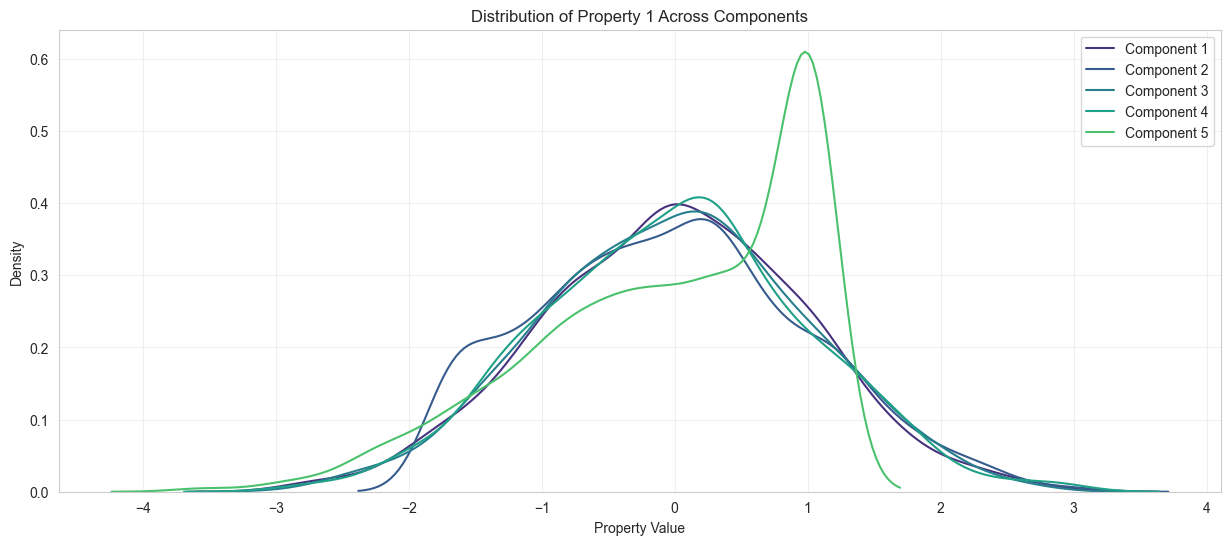

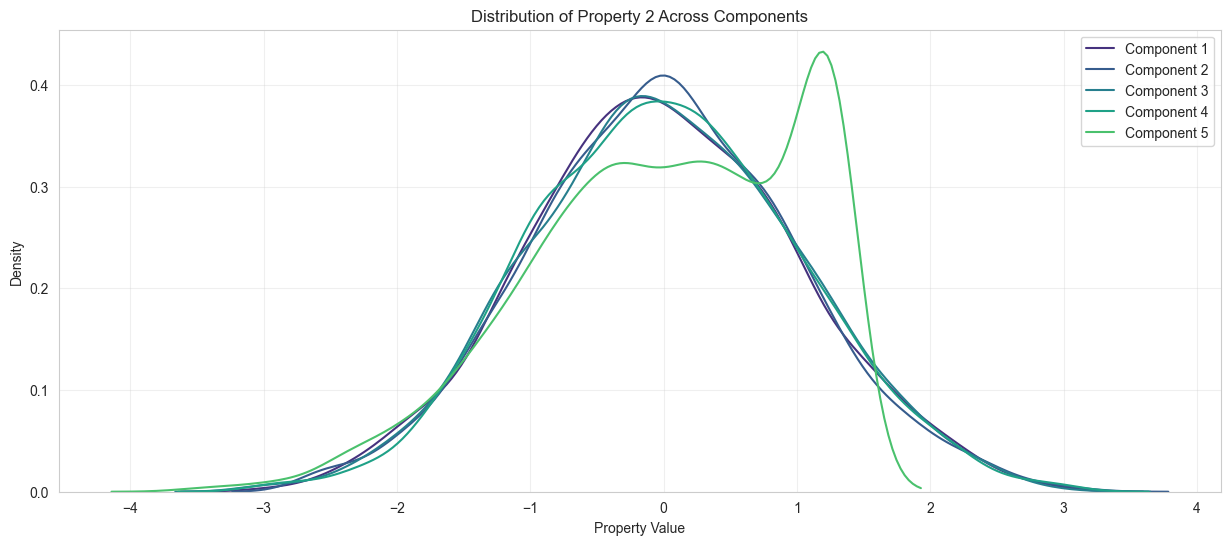

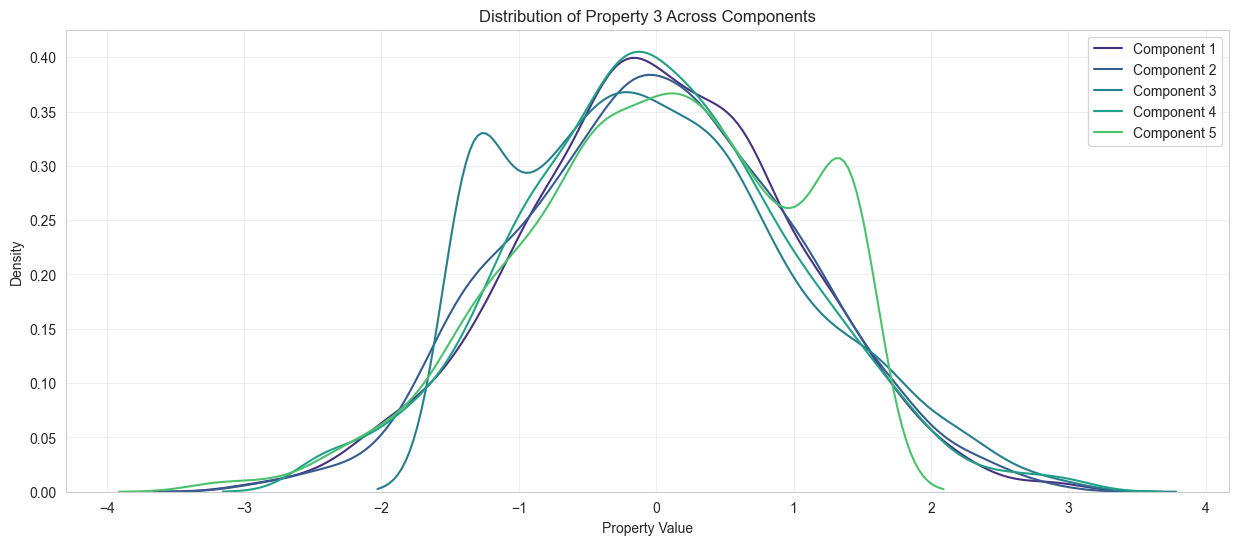

In [24]:
# Function to plot property distributions across components
def plot_property_distributions(property_num):
    plt.figure(figsize=(15, 6))
    
    for i in range(1, 6):
        prop_col = f"Component{i}_Property{property_num}"
        sns.kdeplot(train_data[prop_col], label=f"Component {i}")
    
    plt.title(f'Distribution of Property {property_num} Across Components')
    plt.xlabel('Property Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot distributions for the first 3 properties
for prop_num in range(1, 4):
    plot_property_distributions(prop_num)

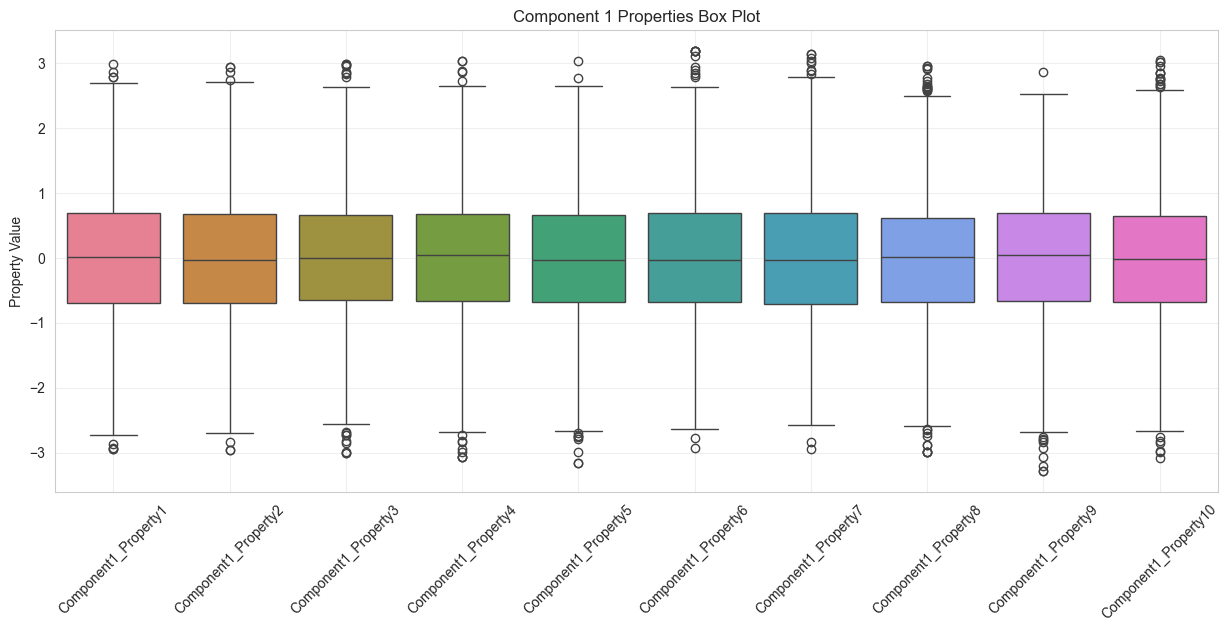

In [25]:
# Box plots for all properties of Component 1
plt.figure(figsize=(15, 6))
sns.boxplot(data=train_data[component_properties['Component1']])
plt.title('Component 1 Properties Box Plot')
plt.ylabel('Property Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

### Correlation Analysis Within Components

Let's examine correlations between properties within each component.

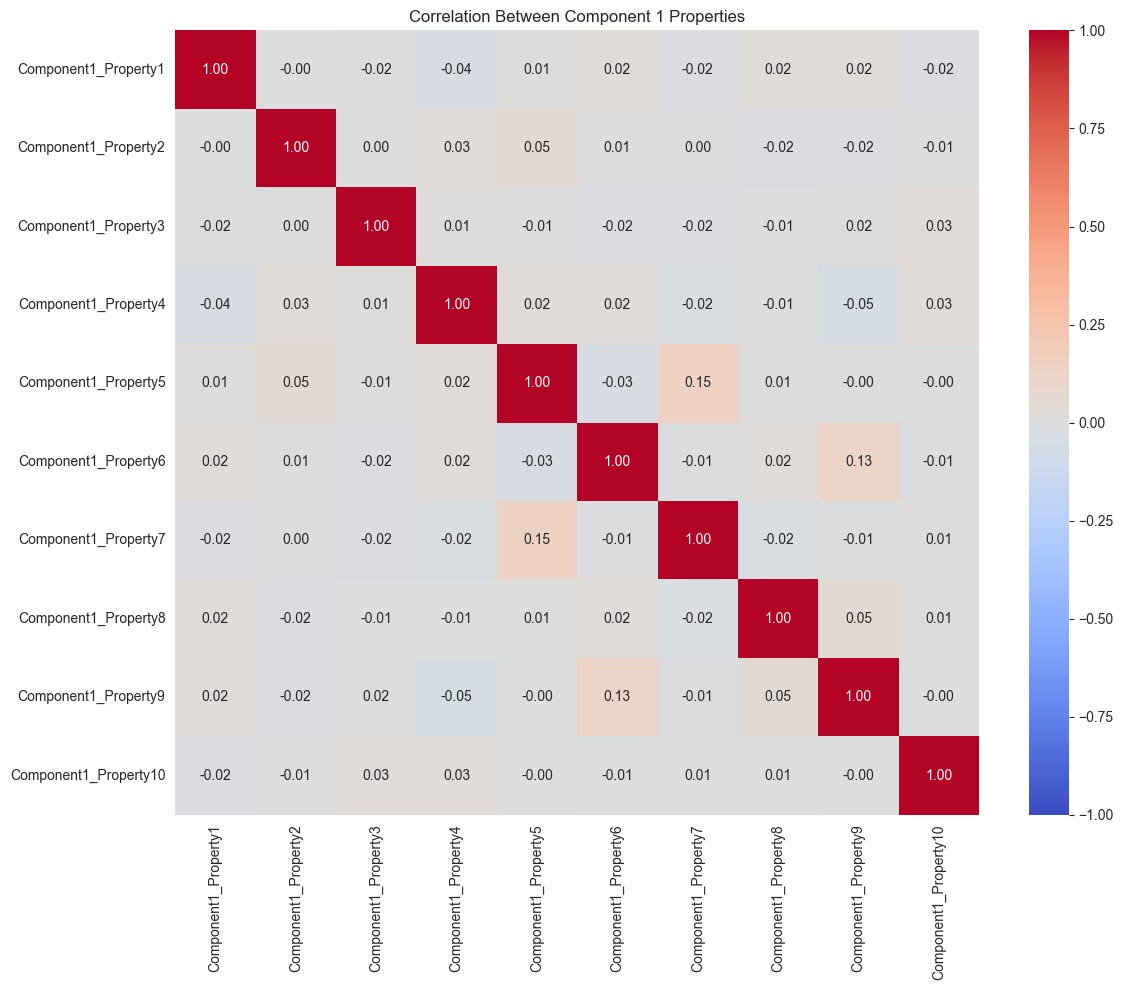

In [26]:
# Correlation heatmap for Component 1 properties
plt.figure(figsize=(12, 10))
comp1_corr = train_data[component_properties['Component1']].corr()
sns.heatmap(comp1_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Between Component 1 Properties')
plt.tight_layout()
plt.show()

In [27]:
# Function to identify highly correlated properties within a component
def find_high_correlations(component_num, threshold=0.7):
    comp_props = component_properties[f'Component{component_num}']
    corr_matrix = train_data[comp_props].corr().abs()
    
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix), k=1)
    high_corr = corr_matrix.where(mask & (corr_matrix > threshold)).stack().reset_index()
    high_corr.columns = ['Property1', 'Property2', 'Correlation']
    high_corr = high_corr.sort_values('Correlation', ascending=False)
    
    return high_corr

# Find high correlations for each component
for i in range(1, 6):
    high_corr = find_high_correlations(i)
    if len(high_corr) > 0:
        print(f"\nHighly correlated properties in Component {i}:")
        display(high_corr)
    else:
        print(f"\nNo highly correlated properties found in Component {i}")


No highly correlated properties found in Component 1

No highly correlated properties found in Component 2

No highly correlated properties found in Component 3

No highly correlated properties found in Component 4

No highly correlated properties found in Component 5


### Cross-Component Property Analysis

Let's analyze how the same property varies across different components.


Property 1 cross-component correlation:


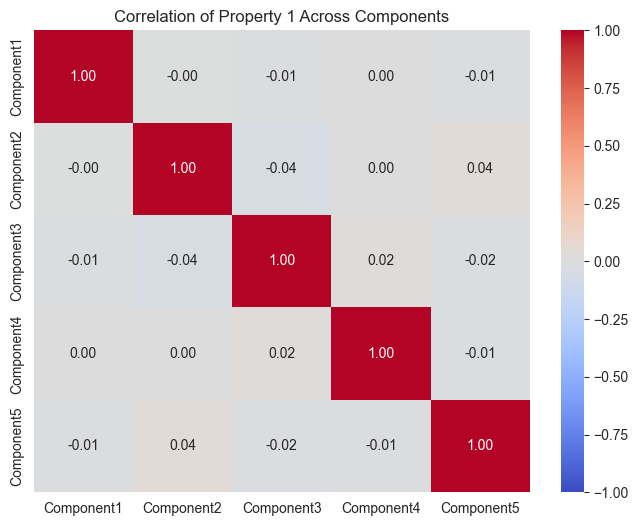


Property 2 cross-component correlation:



Property 3 cross-component correlation:


In [28]:
# Create a dataframe with the same property across all components
def compare_property_across_components(property_num):
    prop_cols = [f"Component{i}_Property{property_num}" for i in range(1, 6)]
    prop_df = train_data[prop_cols]
    
    # Rename columns for clarity
    prop_df.columns = [f"Component{i}" for i in range(1, 6)]
    
    # Calculate correlation matrix
    corr_matrix = prop_df.corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
    plt.title(f'Correlation of Property {property_num} Across Components')
    plt.show()
    
    return corr_matrix

# Compare the first 3 properties across components
for prop_num in range(1, 4):
    print(f"\nProperty {prop_num} cross-component correlation:")
    compare_property_across_components(prop_num)

### Property Variability Analysis

Let's identify which properties have the highest and lowest variability.

In [29]:
# Calculate coefficient of variation for all properties
cv_data = {}
for component, props in component_properties.items():
    for prop in props:
        mean = train_data[prop].mean()
        std = train_data[prop].std()
        # Avoid division by zero
        if mean != 0:
            cv = abs(std / mean)
        else:
            cv = float('inf')
        cv_data[prop] = {'mean': mean, 'std': std, 'cv': cv}

# Convert to DataFrame for easier analysis
cv_df = pd.DataFrame.from_dict(cv_data, orient='index')
cv_df = cv_df.sort_values('cv', ascending=False)

# Display properties with highest variability
print("Properties with highest variability:")
display(cv_df.head(10))

# Display properties with lowest variability
print("\nProperties with lowest variability:")
display(cv_df.tail(10))

Properties with highest variability:


mean   std       cv
Component1_Property1   0.000 0.999 4076.296
Component4_Property8   0.000 0.994 3303.925
Component1_Property6   0.000 0.999 3021.545
Component2_Property2   0.000 0.992 2192.573
Component4_Property9   0.001 1.008 1845.710
Component5_Property10 -0.001 1.002 1376.503
Component5_Property8  -0.001 1.006 1084.731
Component3_Property1   0.002 0.999  586.462
Component2_Property4  -0.002 1.010  570.281
Component3_Property10 -0.002 1.010  472.169


Properties with lowest variability:


mean   std     cv
Component4_Property7 -0.012 1.009 84.184
Component4_Property3 -0.013 1.009 78.743
Component4_Property2  0.014 0.999 73.127
Component2_Property6  0.014 1.007 71.047
Component5_Property9  0.014 0.999 69.055
Component1_Property9 -0.016 0.995 63.372
Component5_Property2  0.016 1.002 61.177
Component5_Property6  0.017 1.009 59.019
Component2_Property1 -0.017 1.006 58.110
Component5_Property1 -0.018 1.009 55.285

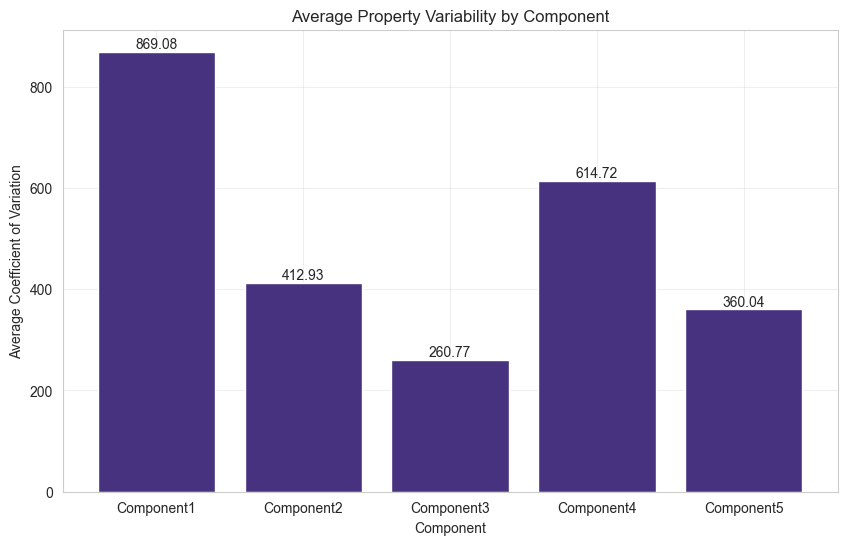

In [30]:
# Visualize property variability by component
component_cv = {}
for component, props in component_properties.items():
    component_cv[component] = cv_df.loc[props, 'cv'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(component_cv.keys(), component_cv.values())
plt.title('Average Property Variability by Component')
plt.xlabel('Component')
plt.ylabel('Average Coefficient of Variation')
plt.grid(True, alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2f}', ha='center', va='bottom')
plt.show()

## Step 4: Target Blend Properties Analysis

Now let's analyze the target blend properties that we need to predict.

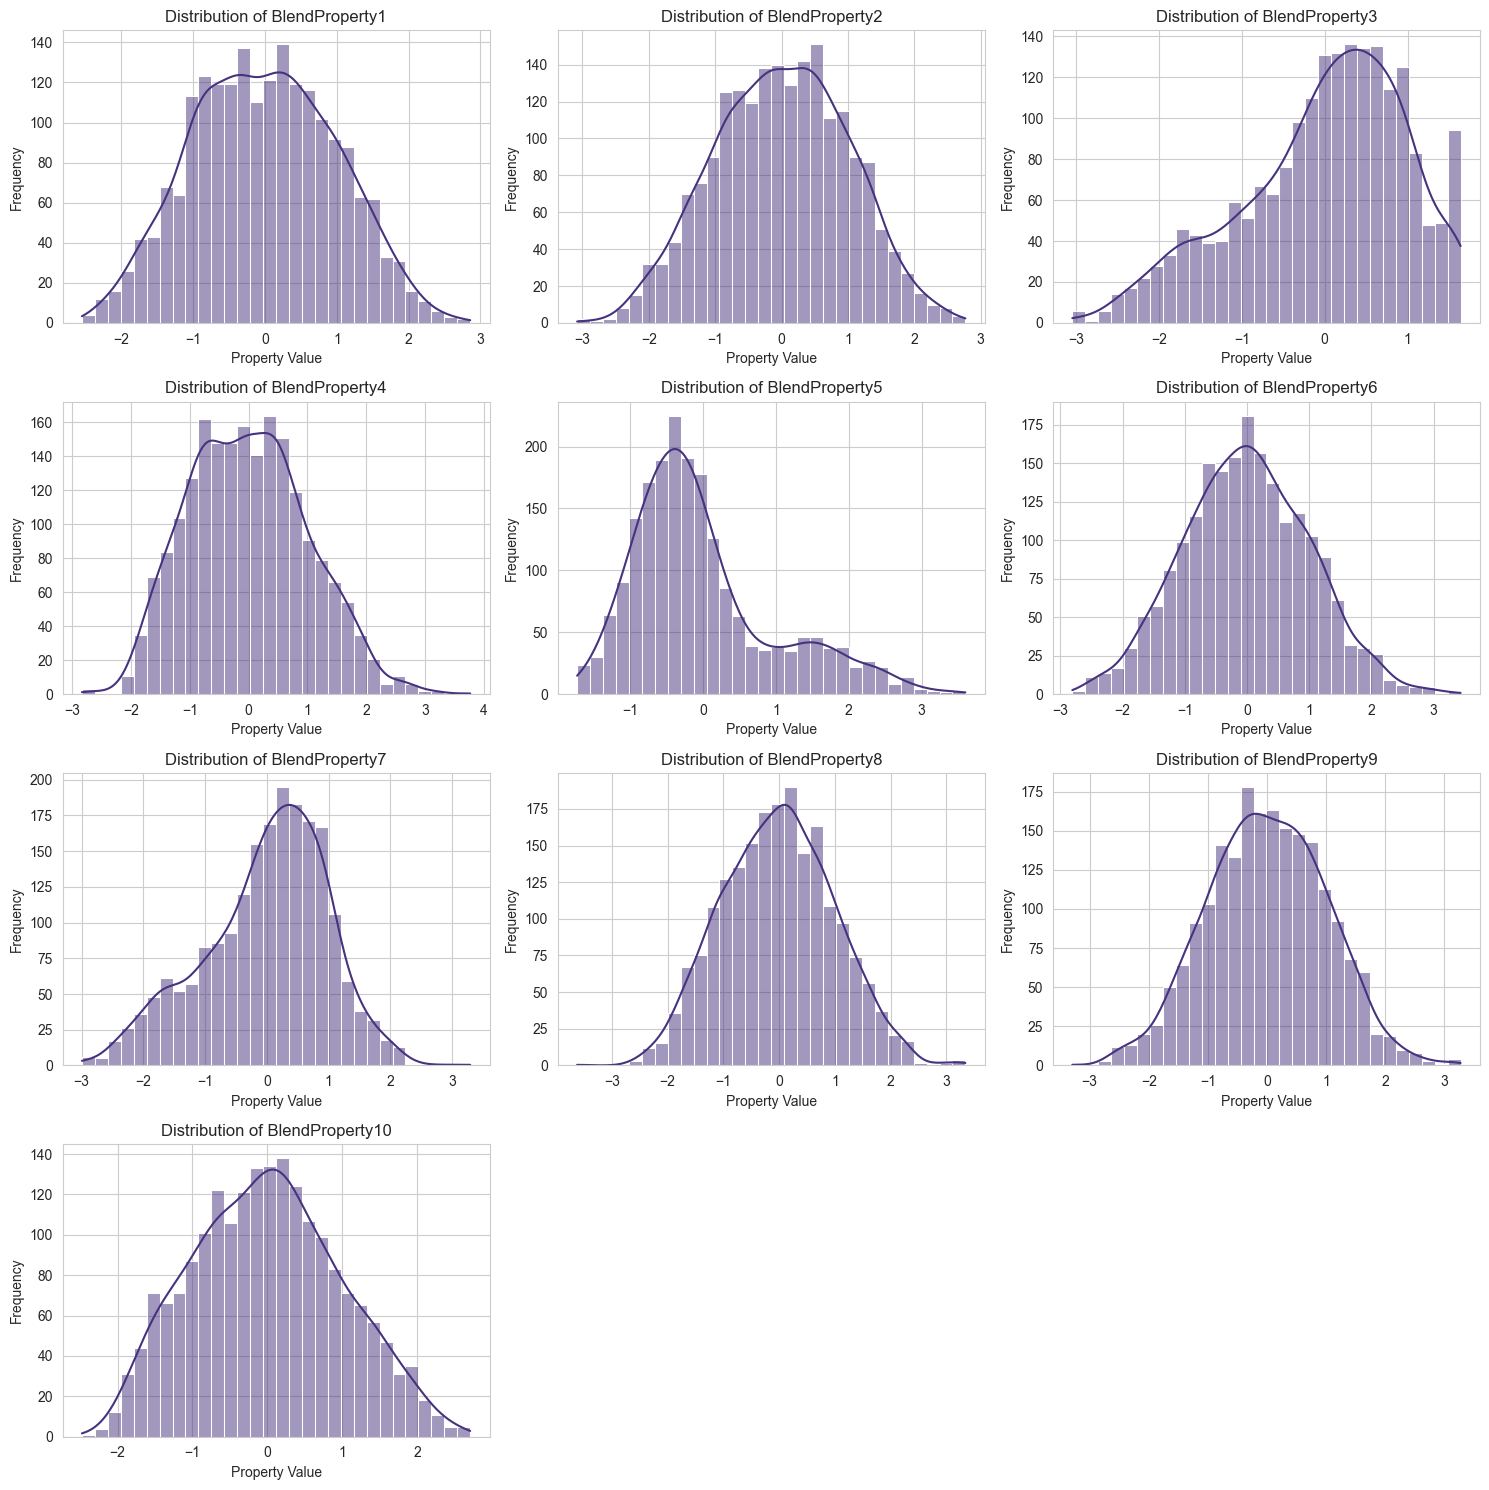

In [31]:
# Distribution of target blend properties
plt.figure(figsize=(15, 15))
for i, col in enumerate(target_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(train_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Property Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [32]:
# Box plots of target properties
plt.figure(figsize=(14, 6))
sns.boxplot(data=train_data[target_cols])
plt.title('Target Blend Properties Box Plot')
plt.ylabel('Property Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

### Correlation Analysis of Target Properties

Let's examine correlations between the target blend properties.

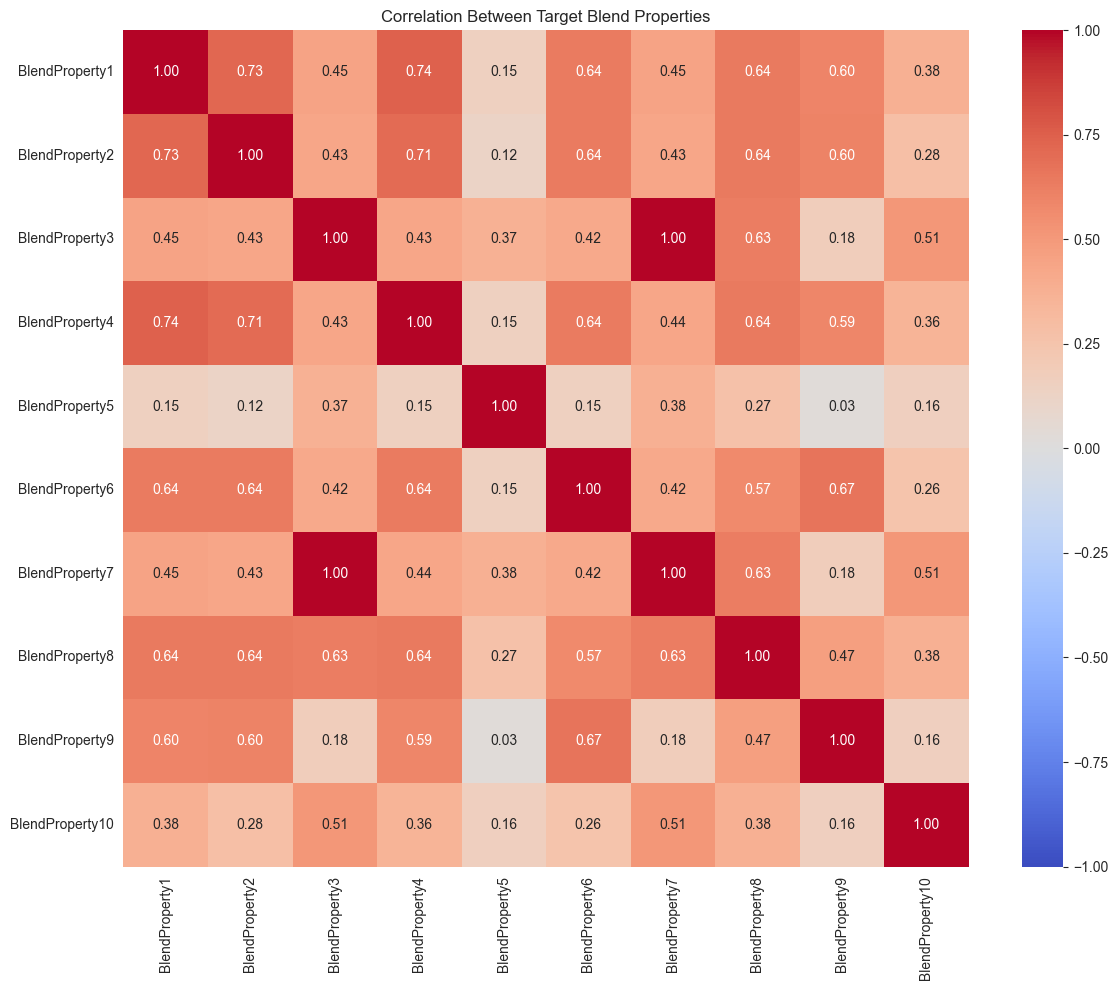


Highly correlated target properties (|r| > 0.7):
BlendProperty3 and BlendProperty7: 0.997
BlendProperty1 and BlendProperty4: 0.743
BlendProperty1 and BlendProperty2: 0.726
BlendProperty2 and BlendProperty4: 0.706


In [33]:
# Correlation heatmap for target properties
plt.figure(figsize=(12, 10))
target_corr = train_data[target_cols].corr()
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Between Target Blend Properties')
plt.tight_layout()
plt.show()

# Identify highly correlated target properties
print("\nHighly correlated target properties (|r| > 0.7):")
high_corr_mask = (target_corr.abs() > 0.7) & (target_corr.abs() < 1.0)
high_corr_pairs = []

for i in range(len(target_corr.columns)):
    for j in range(i+1, len(target_corr.columns)):
        if high_corr_mask.iloc[i, j]:
            prop1 = target_corr.columns[i]
            prop2 = target_corr.columns[j]
            corr_val = target_corr.iloc[i, j]
            high_corr_pairs.append((prop1, prop2, corr_val))

for prop1, prop2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
    print(f"{prop1} and {prop2}: {corr:.3f}")

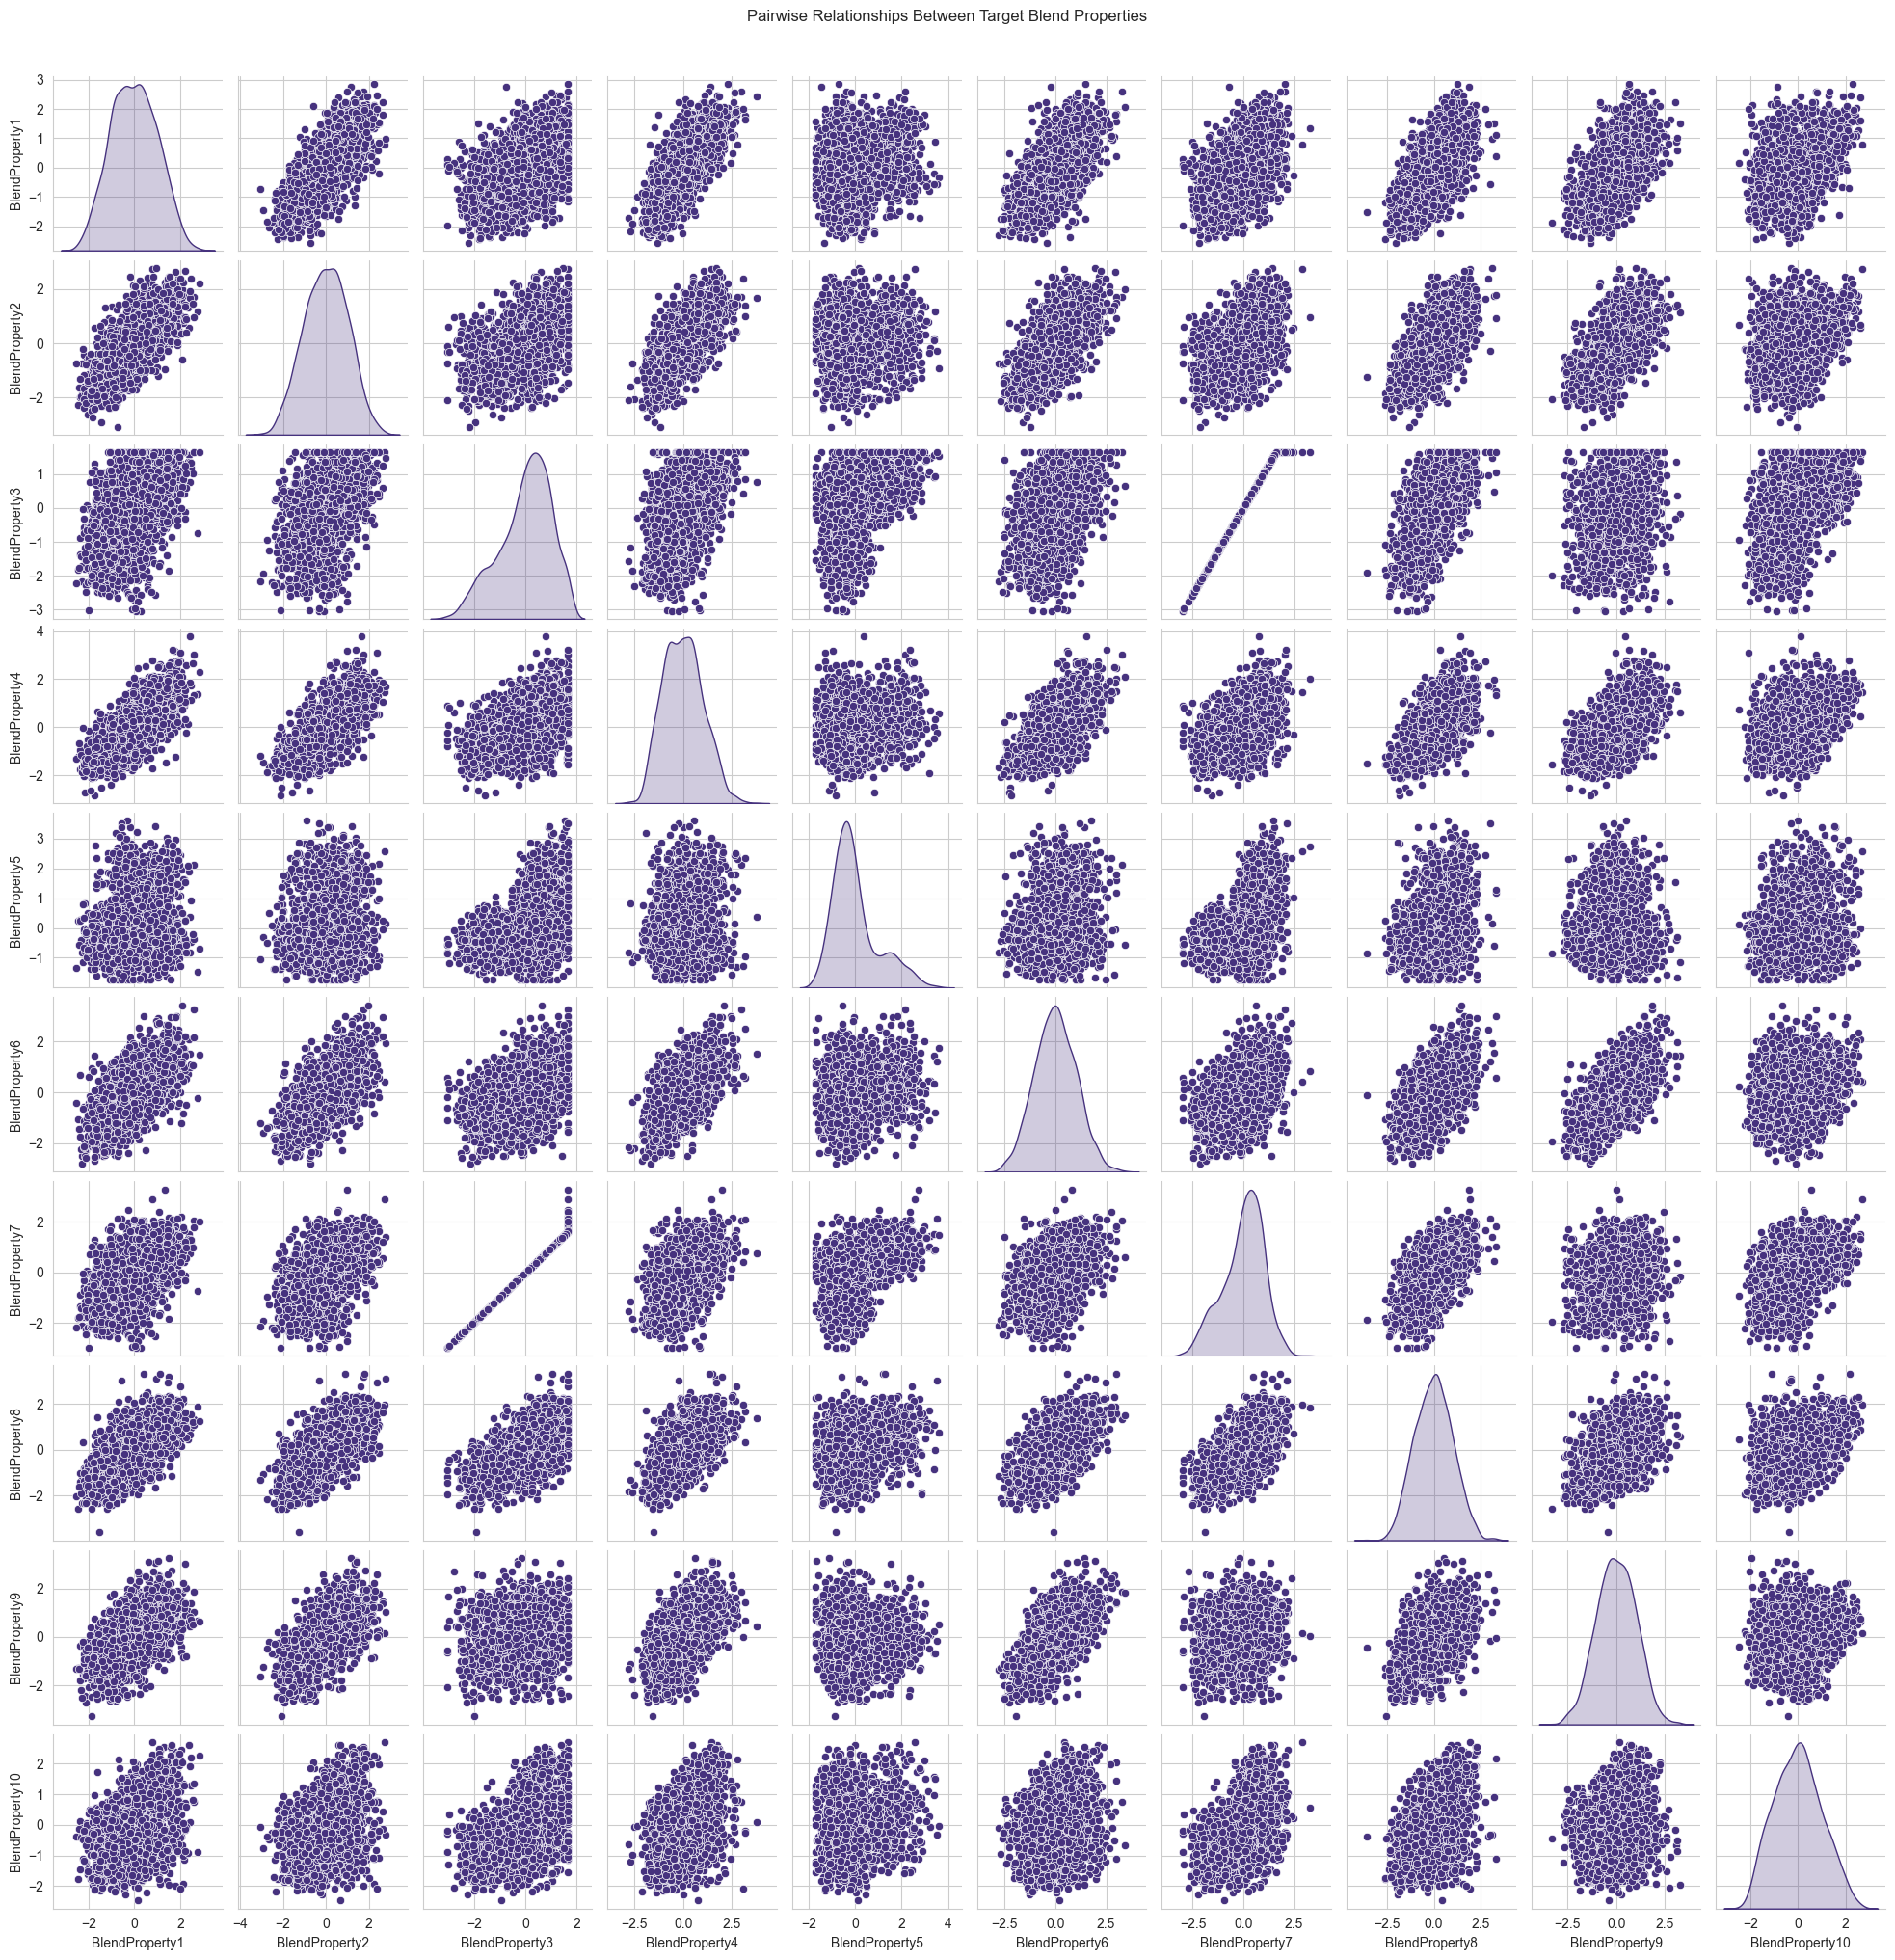

In [34]:
# Pairplot of target properties
sns.pairplot(train_data[target_cols], diag_kind='kde', height=2)
plt.suptitle('Pairwise Relationships Between Target Blend Properties', y=1.02)
plt.show()

### Relationship Between Component Fractions and Target Properties

Let's analyze how component fractions relate to target blend properties.

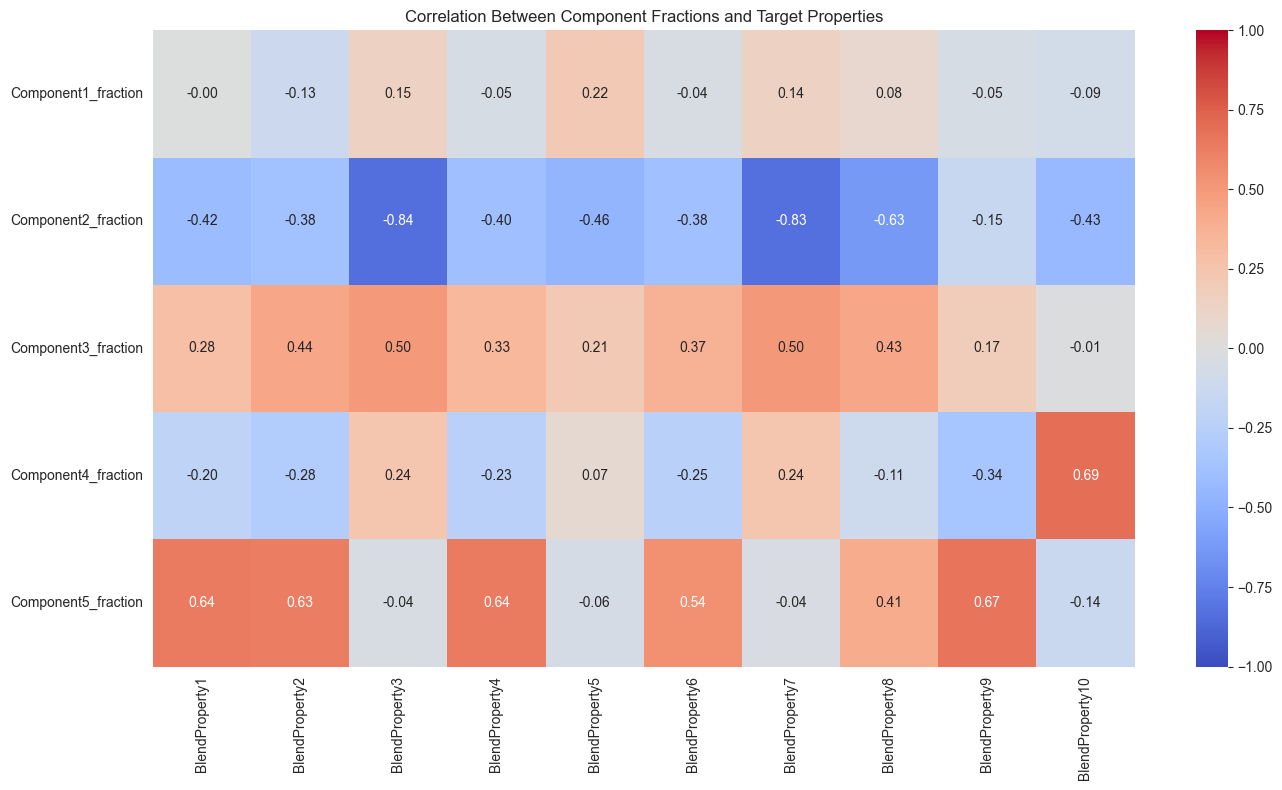

Correlation between component fractions and target properties:


BlendProperty1  BlendProperty2  BlendProperty3  \
Component1_fraction          -0.003          -0.133           0.147   
Component2_fraction          -0.421          -0.376          -0.838   
Component3_fraction           0.282           0.436           0.498   
Component4_fraction          -0.204          -0.282           0.239   
Component5_fraction           0.639           0.630          -0.041   

                     BlendProperty4  BlendProperty5  BlendProperty6  \
Component1_fraction          -0.052           0.215          -0.042   
Component2_fraction          -0.397          -0.462          -0.385   
Component3_fraction           0.331           0.215           0.368   
Component4_fraction          -0.235           0.066          -0.246   
Component5_fraction           0.641          -0.056           0.541   

                     BlendProperty7  BlendProperty8  BlendProperty9  \
Component1_fraction           0.138           0.084          -0.052   
Component2_fraction          -0.832          -0.630          -0.153   
Component3_fraction           0.502           0.435           0.173   
Component4_fraction           0.235          -0.110          -0.345   
Component5_fraction          -0.036           0.405           0.665   

                     BlendProperty10  
Component1_fraction           -0.085  
Component2_fraction           -0.434  
Component3_fraction           -0.012  
Component4_fraction            0.695  
Component5_fraction           -0.140

In [35]:
# Correlation between component fractions and target properties
fraction_target_corr = train_data[fraction_cols + target_cols].corr().iloc[:len(fraction_cols), len(fraction_cols):]

plt.figure(figsize=(14, 8))
sns.heatmap(fraction_target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Between Component Fractions and Target Properties')
plt.tight_layout()
plt.show()

# Display the correlation matrix
print("Correlation between component fractions and target properties:")
fraction_target_corr

In [36]:
# Function to plot relationship between a component fraction and target property
def plot_fraction_target_relationship(fraction_col, target_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=fraction_col, y=target_col, data=train_data)
    
    # Add regression line
    sns.regplot(x=fraction_col, y=target_col, data=train_data, scatter=False, color='red')
    
    plt.title(f'Relationship Between {fraction_col} and {target_col}')
    plt.xlabel(fraction_col)
    plt.ylabel(target_col)
    plt.grid(True, alpha=0.3)
    plt.show()

# Find the strongest correlations between fractions and targets
strongest_corrs = []
for fraction_col in fraction_cols:
    for target_col in target_cols:
        corr = fraction_target_corr.loc[fraction_col, target_col]
        strongest_corrs.append((fraction_col, target_col, corr))

# Sort by absolute correlation value
strongest_corrs.sort(key=lambda x: abs(x[2]), reverse=True)

# Plot the top 3 strongest relationships
print("Top 3 strongest relationships between component fractions and target properties:")
for i, (fraction_col, target_col, corr) in enumerate(strongest_corrs[:3]):
    print(f"{i+1}. {fraction_col} vs {target_col}: correlation = {corr:.3f}")
    plot_fraction_target_relationship(fraction_col, target_col)

Top 3 strongest relationships between component fractions and target properties:
1. Component2_fraction vs BlendProperty3: correlation = -0.838


2. Component2_fraction vs BlendProperty7: correlation = -0.832


3. Component4_fraction vs BlendProperty10: correlation = 0.695


### Relationship Between Component Properties and Target Properties

Let's analyze how individual component properties relate to target blend properties.

In [37]:
# Function to find strongest correlations between component properties and target properties
def find_top_property_correlations(n=10):
    # Calculate correlation matrix
    corr_matrix = train_data[property_cols + target_cols].corr()
    
    # Extract correlations between component properties and target properties
    prop_target_corr = corr_matrix.loc[property_cols, target_cols]
    
    # Convert to long format for easier sorting
    corr_data = []
    for prop_col in property_cols:
        for target_col in target_cols:
            corr_data.append((prop_col, target_col, prop_target_corr.loc[prop_col, target_col]))
    
    # Sort by absolute correlation value
    corr_data.sort(key=lambda x: abs(x[2]), reverse=True)
    
    return corr_data[:n]

# Find top correlations
top_correlations = find_top_property_correlations(15)

# Display results
print("Top 15 strongest correlations between component properties and target properties:")
for i, (prop_col, target_col, corr) in enumerate(top_correlations):
    print(f"{i+1}. {prop_col} vs {target_col}: correlation = {corr:.3f}")

# Create a DataFrame for easier visualization
top_corr_df = pd.DataFrame(top_correlations, columns=['Component Property', 'Target Property', 'Correlation'])
top_corr_df

Top 15 strongest correlations between component properties and target properties:
1. Component4_Property9 vs BlendProperty9: correlation = 0.443
2. Component2_Property5 vs BlendProperty5: correlation = 0.438
3. Component4_Property6 vs BlendProperty6: correlation = 0.398
4. Component4_Property8 vs BlendProperty8: correlation = 0.322
5. Component4_Property2 vs BlendProperty2: correlation = 0.311
6. Component3_Property6 vs BlendProperty6: correlation = 0.262
7. Component1_Property8 vs BlendProperty8: correlation = 0.231
8. Component5_Property8 vs BlendProperty9: correlation = 0.229
9. Component1_Property6 vs BlendProperty6: correlation = 0.226
10. Component1_Property4 vs BlendProperty4: correlation = 0.225
11. Component3_Property1 vs BlendProperty1: correlation = 0.224
12. Component3_Property10 vs BlendProperty10: correlation = 0.223
13. Component3_Property8 vs BlendProperty8: correlation = 0.215
14. Component4_Property4 vs BlendProperty4: correlation = 0.212
15. Component4_Property1 vs B

Component Property  Target Property  Correlation
0    Component4_Property9   BlendProperty9        0.443
1    Component2_Property5   BlendProperty5        0.438
2    Component4_Property6   BlendProperty6        0.398
3    Component4_Property8   BlendProperty8        0.322
4    Component4_Property2   BlendProperty2        0.311
5    Component3_Property6   BlendProperty6        0.262
6    Component1_Property8   BlendProperty8        0.231
7    Component5_Property8   BlendProperty9        0.229
8    Component1_Property6   BlendProperty6        0.226
9    Component1_Property4   BlendProperty4        0.225
10   Component3_Property1   BlendProperty1        0.224
11  Component3_Property10  BlendProperty10        0.223
12   Component3_Property8   BlendProperty8        0.215
13   Component4_Property4   BlendProperty4        0.212
14   Component4_Property1   BlendProperty1        0.209

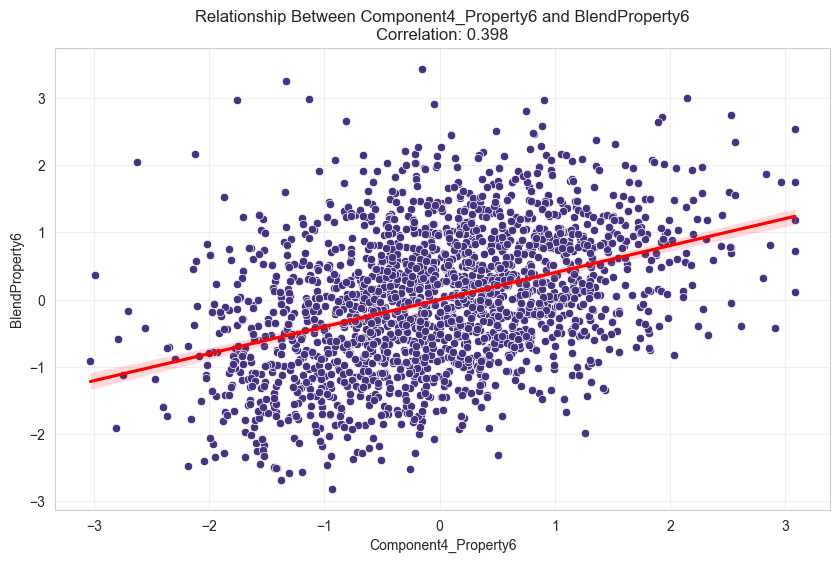

In [38]:
# Plot the top 3 strongest relationships
for i, (prop_col, target_col, corr) in enumerate(top_correlations[:3]):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=prop_col, y=target_col, data=train_data)
    
    # Add regression line
    sns.regplot(x=prop_col, y=target_col, data=train_data, scatter=False, color='red')
    
    plt.title(f'Relationship Between {prop_col} and {target_col}\nCorrelation: {corr:.3f}')
    plt.xlabel(prop_col)
    plt.ylabel(target_col)
    plt.grid(True, alpha=0.3)
    plt.show()

### Weighted Component Properties Analysis

Let's create weighted component properties based on their fractions and analyze their relationship with target properties.

In [39]:
# Create weighted properties for each component
weighted_props = {}

for prop_num in range(1, 11):  # For each property type (1-10)
    weighted_prop_name = f"Weighted_Property{prop_num}"
    
    # Initialize with zeros
    train_data[weighted_prop_name] = 0
    
    # Add weighted contribution from each component
    for comp_num in range(1, 6):  # For each component (1-5)
        fraction_col = f"Component{comp_num}_fraction"
        prop_col = f"Component{comp_num}_Property{prop_num}"
        
        train_data[weighted_prop_name] += train_data[fraction_col] * train_data[prop_col]
    
    weighted_props[weighted_prop_name] = weighted_prop_name

weighted_prop_cols = list(weighted_props.values())
print(f"Created {len(weighted_prop_cols)} weighted property columns")

Created 10 weighted property columns


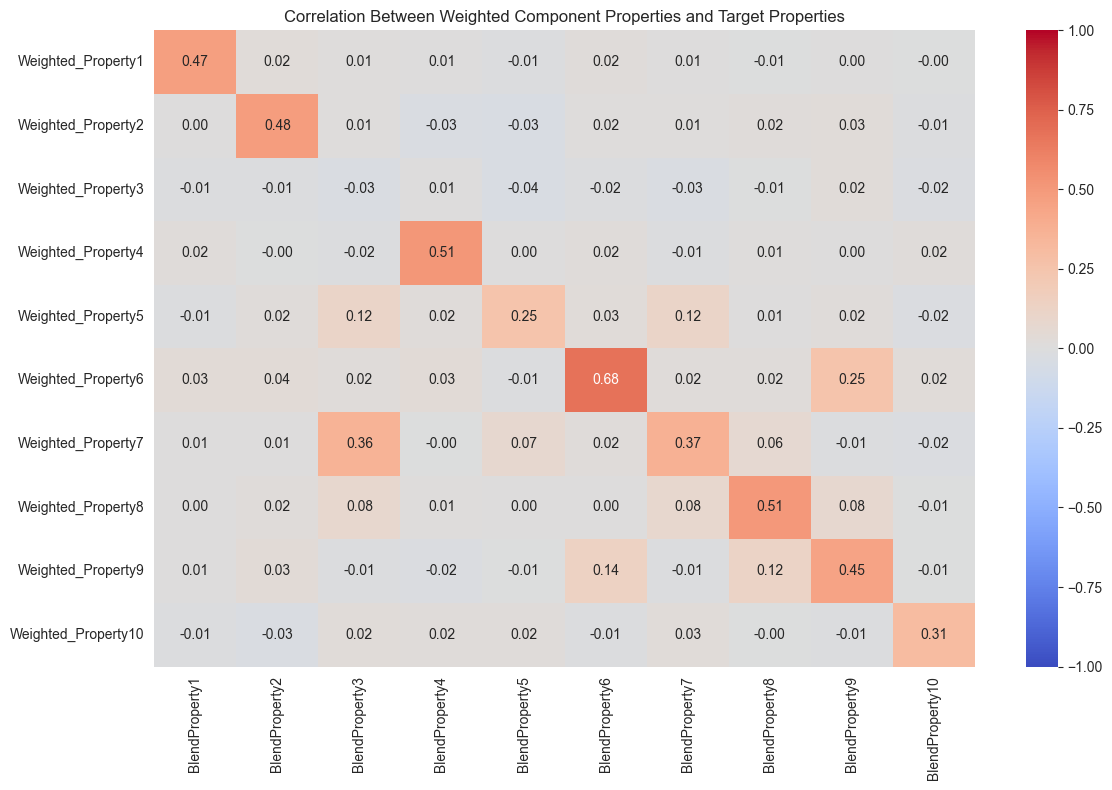

Correlation between weighted properties and target properties:


BlendProperty1  BlendProperty2  BlendProperty3  \
Weighted_Property1            0.475           0.025           0.009   
Weighted_Property2            0.003           0.483           0.014   
Weighted_Property3           -0.013          -0.012          -0.029   
Weighted_Property4            0.016          -0.003          -0.015   
Weighted_Property5           -0.011           0.021           0.115   
Weighted_Property6            0.033           0.035           0.020   
Weighted_Property7            0.005           0.005           0.361   
Weighted_Property8            0.001           0.022           0.081   
Weighted_Property9            0.006           0.034          -0.008   
Weighted_Property10          -0.011          -0.025           0.025   

                     BlendProperty4  BlendProperty5  BlendProperty6  \
Weighted_Property1            0.007          -0.008           0.020   
Weighted_Property2           -0.031          -0.032           0.016   
Weighted_Property3            0.005          -0.038          -0.015   
Weighted_Property4            0.510           0.004           0.021   
Weighted_Property5            0.016           0.250           0.029   
Weighted_Property6            0.033          -0.010           0.678   
Weighted_Property7           -0.002           0.073           0.021   
Weighted_Property8            0.012           0.001           0.003   
Weighted_Property9           -0.017          -0.006           0.138   
Weighted_Property10           0.022           0.021          -0.010   

                     BlendProperty7  BlendProperty8  BlendProperty9  \
Weighted_Property1            0.006          -0.006           0.001   
Weighted_Property2            0.011           0.017           0.028   
Weighted_Property3           -0.030          -0.006           0.024   
Weighted_Property4           -0.015           0.011           0.004   
Weighted_Property5            0.116           0.005           0.021   
Weighted_Property6            0.018           0.018           0.254   
Weighted_Property7            0.372           0.064          -0.012   
Weighted_Property8            0.083           0.507           0.075   
Weighted_Property9           -0.010           0.119           0.446   
Weighted_Property10           0.025          -0.001          -0.011   

                     BlendProperty10  
Weighted_Property1            -0.003  
Weighted_Property2            -0.013  
Weighted_Property3            -0.016  
Weighted_Property4             0.020  
Weighted_Property5            -0.023  
Weighted_Property6             0.024  
Weighted_Property7            -0.020  
Weighted_Property8            -0.006  
Weighted_Property9            -0.006  
Weighted_Property10            0.311

In [40]:
# Correlation between weighted properties and target properties
weighted_target_corr = train_data[weighted_prop_cols + target_cols].corr().iloc[:len(weighted_prop_cols), len(weighted_prop_cols):]

plt.figure(figsize=(12, 8))
sns.heatmap(weighted_target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Between Weighted Component Properties and Target Properties')
plt.tight_layout()
plt.show()

# Display the correlation matrix
print("Correlation between weighted properties and target properties:")
weighted_target_corr

Top 3 strongest relationships between weighted properties and target properties:
1. Weighted_Property6 vs BlendProperty6: correlation = 0.678


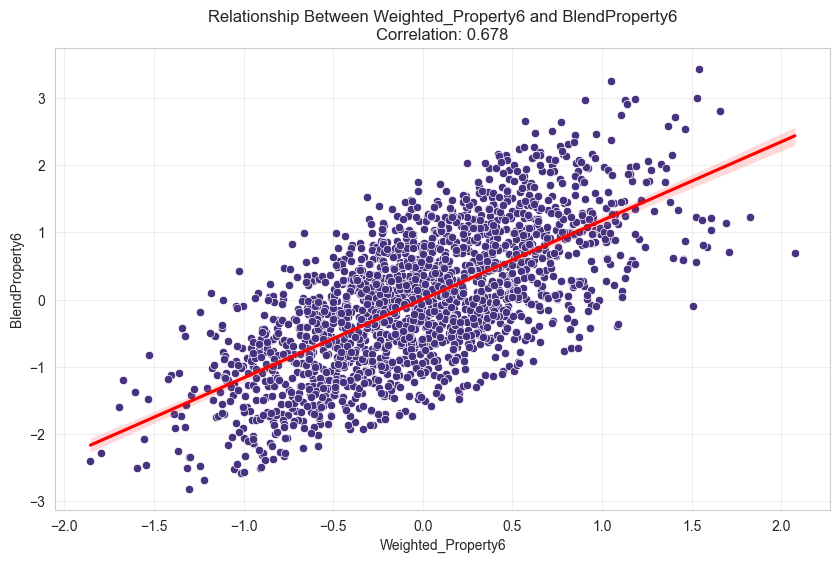

2. Weighted_Property4 vs BlendProperty4: correlation = 0.510


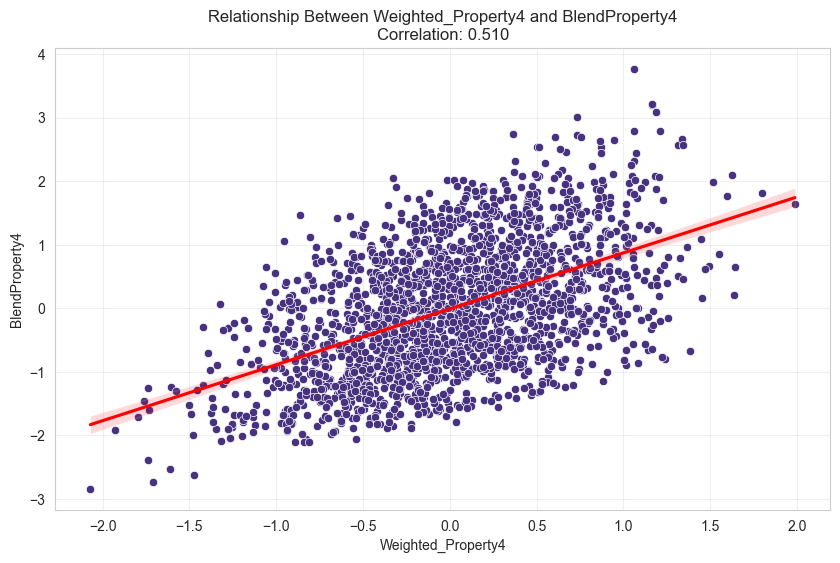

3. Weighted_Property8 vs BlendProperty8: correlation = 0.507


In [41]:
# Plot the strongest relationships between weighted properties and targets
strongest_weighted_corrs = []
for weighted_col in weighted_prop_cols:
    for target_col in target_cols:
        corr = weighted_target_corr.loc[weighted_col, target_col]
        strongest_weighted_corrs.append((weighted_col, target_col, corr))

# Sort by absolute correlation value
strongest_weighted_corrs.sort(key=lambda x: abs(x[2]), reverse=True)

# Plot the top 3 strongest relationships
print("Top 3 strongest relationships between weighted properties and target properties:")
for i, (weighted_col, target_col, corr) in enumerate(strongest_weighted_corrs[:3]):
    print(f"{i+1}. {weighted_col} vs {target_col}: correlation = {corr:.3f}")
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=weighted_col, y=target_col, data=train_data)
    
    # Add regression line
    sns.regplot(x=weighted_col, y=target_col, data=train_data, scatter=False, color='red')
    
    plt.title(f'Relationship Between {weighted_col} and {target_col}\nCorrelation: {corr:.3f}')
    plt.xlabel(weighted_col)
    plt.ylabel(target_col)
    plt.grid(True, alpha=0.3)
    plt.show()